In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from sklearn.impute import SimpleImputer


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_csv("googleplaystore.csv")

In [7]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
# Shape of teh dataset

In [10]:
data.shape

(10841, 13)

In [11]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
data.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [15]:
#It is a function that shows the analysis of proximity values between data.
data.corr()

,Rating
Rating,1.0


In [16]:
data.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [17]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
data[data["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
len(data.App.unique())

9660

In [20]:
data = data.drop_duplicates(subset=['App'], keep = 'first')
print(data.shape)

(9660, 13)


In [21]:
data.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
imputer = SimpleImputer()
data['Rating'] = imputer.fit_transform(data[['Rating']])


In [23]:
data.shape

(9660, 13)

In [24]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [25]:
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
data.shape

(9648, 13)

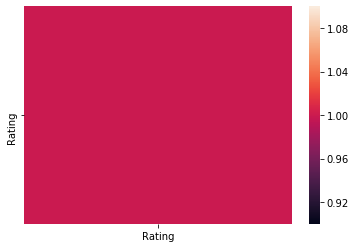

In [27]:
sns.heatmap(data.corr())

# APP

In [28]:
data["App"].count()

9648

In [29]:
data["App"].head()
app_data=pd.DataFrame(data["App"])
app_data.reset_index().head()


,index,App
0,0,Photo Editor & Candy Camera & Grid & ScrapBook
1,1,Coloring book moana
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,3,Sketch - Draw & Paint
4,4,Pixel Draw - Number Art Coloring Book


# CATEGORY

In [30]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
x=data["Category"].value_counts()
x

FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [32]:
#data.sort_values("Category", inplace=True)

In [33]:
#Top 10 App Category

In [34]:
data_cate= pd.crosstab(index= data['Category'], columns='count').reset_index()
top_ten_cate=data_cate.sort_values(by="count", ascending=False).reset_index().head(10)
top_ten_cate

col_0,index,Category,count
0,11,FAMILY,1828
1,14,GAME,959
2,29,TOOLS,825
3,4,BUSINESS,420
4,20,MEDICAL,395
5,23,PERSONALIZATION,374
6,25,PRODUCTIVITY,374
7,18,LIFESTYLE,369
8,12,FINANCE,345
9,28,SPORTS,325


In [35]:
data[data["Category"]=="FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.400000,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.400000,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.500000,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.600000,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.500000,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,4.175052,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.200000,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.000000,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [36]:
# top category with app name

In [37]:
data.groupby("Category")["App"]

In [38]:
# lowest category apps

In [39]:
data["Category"].value_counts().sort_values().head(10)

BEAUTY                 53
COMICS                 56
PARENTING              60
ART_AND_DESIGN         63
EVENTS                 64
HOUSE_AND_HOME         74
WEATHER                79
LIBRARIES_AND_DEMO     83
AUTO_AND_VEHICLES      85
ENTERTAINMENT         102
Name: Category, dtype: int64

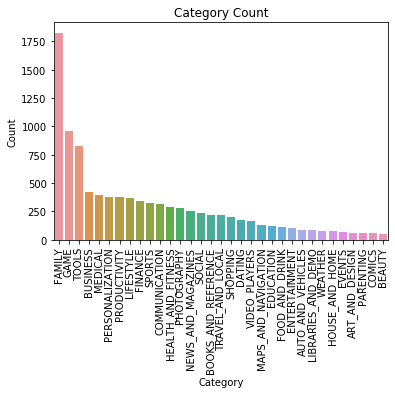

In [40]:
sns.barplot(x=data['Category'].value_counts().index,y=data['Category'].value_counts().values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Count")
plt.xticks(rotation=90)
plt.show()

# rating

In [41]:
data["Rating"].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [42]:
# We can also add a colomn 
bins = [1, 2, 3, 4,4.9, 5]
label=[1,2,3,4,5]
data['Rating_new'] = pd.cut(data['Rating'], bins,labels=label)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [43]:
# Checking if the rating column has uncorect value

In [44]:
data[data["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new


In [45]:
# Top rated Apps with rating 4.5

In [46]:
top_rated=data[data["Rating"]>4.5]
top_rated.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,4
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up,4
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up,4
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,4


In [47]:
top_rated['Rating'].count()

1702

In [48]:
top_rate=data[data["Rating"]==5]
top_rate["Rating"].count()

271

In [49]:
top_rate.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,5
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,5
615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,5
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,5
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,5


In [50]:
t_rate=top_rate.groupby('Category')['Rating'].count()
#sum and display of paid products for the filtered area in terms of categorical
d1=pd.DataFrame(t_rate.index,columns=['Category'])
d2=pd.DataFrame(t_rate.values,columns=['Rating_count'])
data_t_rate=pd.concat([d1,d2],axis=1)
data_t_rate=data_t_rate.sort_values(by='Rating_count', ascending= False)
data_t_rate.reset_index().head()

,index,Category,Rating_count
0,7,FAMILY,67
1,13,LIFESTYLE,29
2,14,MEDICAL,25
3,2,BUSINESS,18
4,23,TOOLS,17


In [51]:
data_t_rate.head()

,Category,Rating_count
7,FAMILY,67
13,LIFESTYLE,29
14,MEDICAL,25
2,BUSINESS,18
23,TOOLS,17


In [52]:
data_t_rate[data_t_rate["Category"]=="ART_AND_DESIGN"]

,Category,Rating_count
0,ART_AND_DESIGN,1


In [53]:
top_rate.Category.value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
PRODUCTIVITY            8
SOCIAL                  8
FINANCE                 8
NEWS_AND_MAGAZINES      7
EVENTS                  6
SHOPPING                6
DATING                  6
BOOKS_AND_REFERENCE     6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
FOOD_AND_DRINK          2
COMICS                  2
LIBRARIES_AND_DEMO      2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

In [54]:
top_rate[top_rate["Category"]=='FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63M,10+,Paid,$4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up,5
5268,AJ Rafael Music Lessons,FAMILY,5.0,1,8.2M,10+,Free,0,Everyone,Entertainment,"November 29, 2017",1.2.1,4.1 and up,5
5450,AP® Guide,FAMILY,5.0,3,2.1M,"1,000+",Free,0,Everyone,Education,"July 31, 2017",1.3,4.0.3 and up,5
5482,meStudying: AP English Lit,FAMILY,5.0,1,655k,10+,Paid,$4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,5
5489,AP Art History Flashcards,FAMILY,5.0,1,96M,10+,Paid,$29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,Jigsaw Volvo FH 16 Trucks,FAMILY,5.0,5,8.1M,"1,000+",Free,0,Teen,Puzzle,"December 1, 2016",1.0,4.0 and up,5
10416,FH School,FAMILY,5.0,4,5.8M,100+,Free,0,Everyone,Education,"April 11, 2018",1.0.1,4.0.3 and up,5
10629,Florida Wildflowers,FAMILY,5.0,5,69M,"1,000+",Free,0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,5
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,5


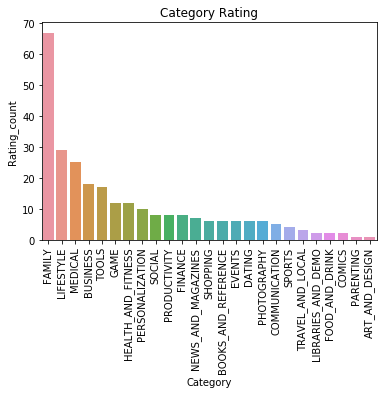

In [55]:
sns.barplot(x=data_t_rate['Category'],y=data_t_rate['Rating_count'])
plt.xlabel("Category")
plt.ylabel("Rating_count")
plt.title("Category Rating")
plt.xticks(rotation=90)
plt.show()

In [56]:
# Minimun Rated apps

In [57]:
data[data["Rating"]<2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,1
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,NaN
4006,C by GE,LIFESTYLE,1.7,686,6.6M,"10,000+",Free,0,Everyone,Lifestyle,"July 11, 2018",4.1.07,4.3 and up,1
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,NaN
4161,G-Playlists,TOOLS,1.8,53,3.4M,"1,000+",Paid,$1.49,Everyone,Tools,"May 19, 2018",1.91,4.0.3 and up,1
4522,Q-Tech Companion App,FOOD_AND_DRINK,1.8,17,3.1M,"10,000+",Free,0,Everyone,Food & Drink,"March 8, 2017",1.6.3,4.4 and up,1
4726,W Box VMS,VIDEO_PLAYERS,1.9,105,9.1M,"10,000+",Free,0,Everyone,Video Players & Editors,"January 9, 2017",4.0.4,2.3.3 and up,1
4904,Smart-AC Universal Remote Free,FAMILY,1.8,3270,1.8M,"500,000+",Free,0,Everyone,Entertainment,"August 18, 2015",1.0,2.2 and up,1
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,1.7M,"100,000+",Free,0,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up,1
4906,Kenmore Smart AC,LIFESTYLE,1.9,71,24M,"5,000+",Free,0,Everyone,Lifestyle,"May 8, 2017",1.0.11,4.4 and up,1


In [58]:
min_rating=data[data["Rating"]<2.0]
min_rating["Rating"].count()

54

In [59]:
min_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,1
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,NaN
4006,C by GE,LIFESTYLE,1.7,686,6.6M,"10,000+",Free,0,Everyone,Lifestyle,"July 11, 2018",4.1.07,4.3 and up,1
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,NaN
4161,G-Playlists,TOOLS,1.8,53,3.4M,"1,000+",Paid,$1.49,Everyone,Tools,"May 19, 2018",1.91,4.0.3 and up,1


In [60]:
min_rating.Category.value_counts()

FAMILY                 11
TOOLS                   9
FINANCE                 5
LIFESTYLE               5
MEDICAL                 4
PRODUCTIVITY            3
VIDEO_PLAYERS           2
GAME                    2
FOOD_AND_DRINK          2
BUSINESS                2
DATING                  2
SOCIAL                  1
MAPS_AND_NAVIGATION     1
NEWS_AND_MAGAZINES      1
SHOPPING                1
SPORTS                  1
HEALTH_AND_FITNESS      1
COMMUNICATION           1
Name: Category, dtype: int64

In [61]:
min_rating[min_rating["Category"]=="TOOLS"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
4161,G-Playlists,TOOLS,1.8,53,3.4M,"1,000+",Paid,$1.49,Everyone,Tools,"May 19, 2018",1.91,4.0.3 and up,1
5941,Loreal - BA Makeup,TOOLS,1.9,8,6.7M,"1,000+",Free,0,Everyone,Tools,"April 18, 2018",1.1.1,4.0.3 and up,1
7633,Co Checker,TOOLS,1.9,12,2.0M,"1,000+",Free,0,Everyone,Tools,"October 20, 2017",1.8.6,4.3 and up,1
7677,Hercules CP Mobile,TOOLS,1.4,20,4.1M,"1,000+",Free,0,Everyone,Tools,"July 6, 2018",2.1.5,4.3 and up,1
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500+,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,NaN
8857,DT Smart,TOOLS,1.6,39,8.9M,"1,000+",Free,0,Everyone,Tools,"December 7, 2017",1.1.4,4.1 and up,1
8859,DT Baby Cam,TOOLS,1.7,10,23M,500+,Free,0,Everyone,Tools,"December 5, 2017",3.0,2.2 and up,1
8875,DT future1 cam,TOOLS,1.0,1,24M,50+,Free,0,Everyone,Tools,"March 27, 2018",3.1,2.2 and up,NaN
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,NaN


In [63]:
m_rate=min_rating.groupby('Category')['Rating'].count()
#sum and display of paid products for the filtered area in terms of categorical
d1=pd.DataFrame(m_rate.index,columns=['Category'])
d2=pd.DataFrame(m_rate.values,columns=['Rating_count'])
data_m_rate=pd.concat([d1,d2],axis=1)
data_m_rate=data_m_rate.sort_values(by='Rating_count', ascending= False)
data_m_rate.reset_index().head()

,index,Category,Rating_count
0,3,FAMILY,11
1,16,TOOLS,9
2,8,LIFESTYLE,5
3,4,FINANCE,5
4,10,MEDICAL,4


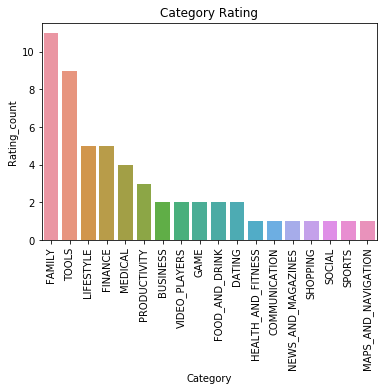

In [64]:
sns.barplot(x=data_m_rate['Category'],y=data_m_rate['Rating_count'])
plt.xlabel("Category")
plt.ylabel("Rating_count")
plt.title("Category Rating")
plt.xticks(rotation=90)
plt.show()

In [65]:
data.Rating.describe()

count    9648.000000
mean        4.173583
std         0.494475
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

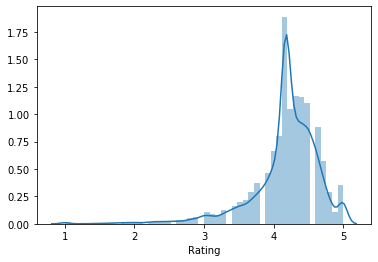

In [66]:

sns.distplot(data["Rating"])
plt.show()

Text(0.5, 1.0, 'Distribution of Rating')

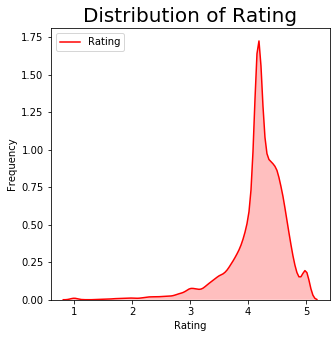

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,5
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0.5, 1, 'Boxplot of Rating VS Category')

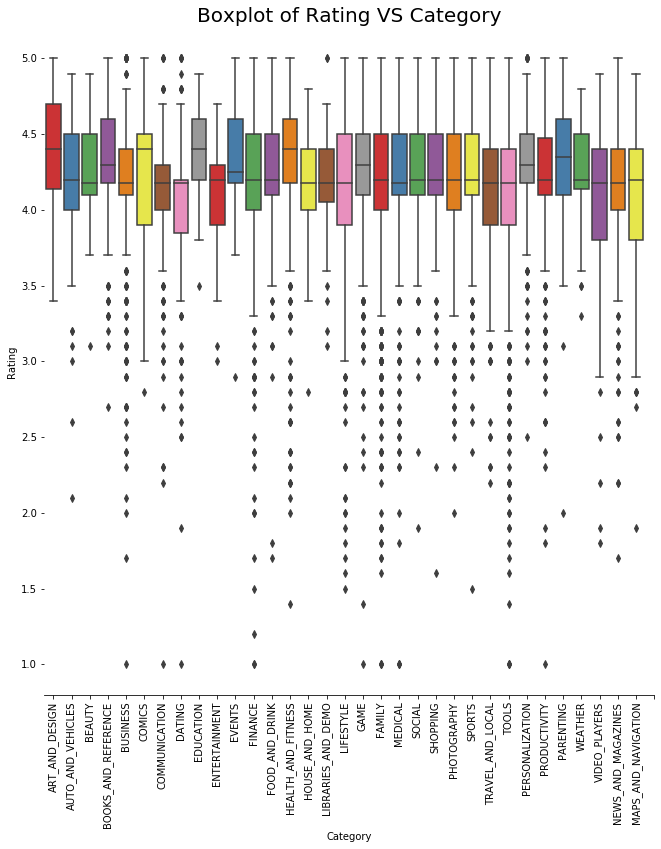

In [68]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

In [69]:
#data[data["Rating"]==5]["App"]

In [70]:
#Ratings with category coloumn

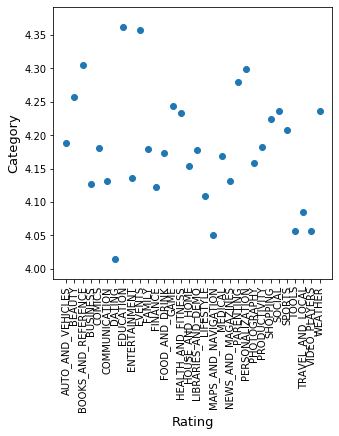

In [71]:
fig, ax = plt.subplots()
ax.scatter(x = data.groupby('Category')['Rating'].mean()[1:].index, y = data.groupby('Category')['Rating'].mean()[1:].values)
plt.ylabel('Category', fontsize=13)
plt.xlabel('Rating', fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [72]:
cat_rate=data.groupby('Category')['Rating'].sum()
#sum and display of paid products for the filtered area in terms of categorical
d1=pd.DataFrame(cat_rate.index,columns=['Category'])
d2=pd.DataFrame(cat_rate.values,columns=['Rating'])
data_cat_rate=pd.concat([d1,d2],axis=1)
data_cat_rate=data_cat_rate.sort_values(by='Rating')
data_cat_rate.reset_index().head()

,index,Category,Rating
0,2,BEAUTY,225.625570
1,5,COMICS,234.150104
2,22,PARENTING,256.750518
3,0,ART_AND_DESIGN,275.125156
4,10,EVENTS,278.925985


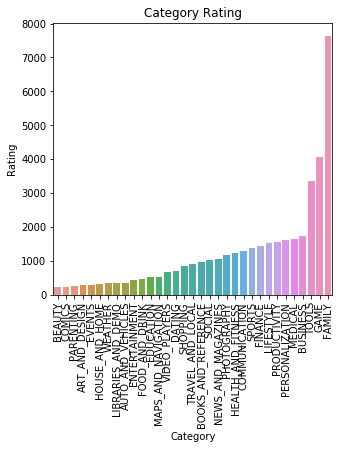

In [73]:
sns.barplot(x=data_cat_rate['Category'],y=data_cat_rate['Rating'])
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category Rating")
plt.xticks(rotation=90)
plt.show()

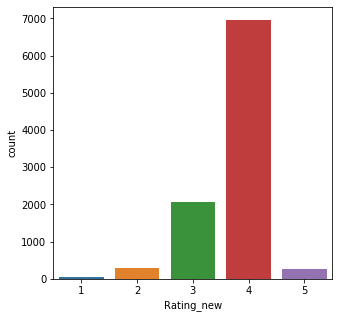

In [74]:
sns.countplot(data.Rating_new)

In [75]:
data["Rating_new"].value_counts()

4    6956
3    2061
2     294
5     271
1      50
Name: Rating_new, dtype: int64

In [76]:
catrate=data.groupby('Rating_new')['Category'].count()
#sum and display of paid products for the filtered area in terms of categorical
d1=pd.DataFrame(catrate.index,columns=['Rating_new'])
d2=pd.DataFrame(catrate.values,columns=['Category'])
data_catrate=pd.concat([d1,d2],axis=1)
data_catrate=data_catrate.sort_values(by='Rating_new')
data_catrate

,Rating_new,Category
0,1,50
1,2,294
2,3,2061
3,4,6956
4,5,271


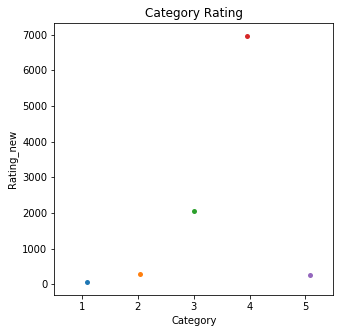

In [77]:
sns.stripplot(x=data_catrate['Rating_new'],y=data_catrate['Category'].values)
plt.xlabel("Category")
plt.ylabel("Rating_new")
plt.title("Category Rating")
#plt.xticks(rotation=90)
plt.show()

In [78]:
# REVIEWS

In [79]:
data["Reviews"]=data["Reviews"].astype("int")


In [80]:
data["Reviews"].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

In [81]:
data["Reviews"].isnull().sum()

0

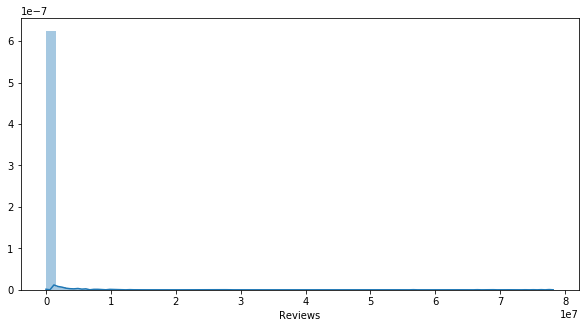

In [82]:
plt.figure(figsize=(10,5))
sns.distplot(data.Reviews)

Text(0.5, 1.0, 'Distribution of Reveiw')

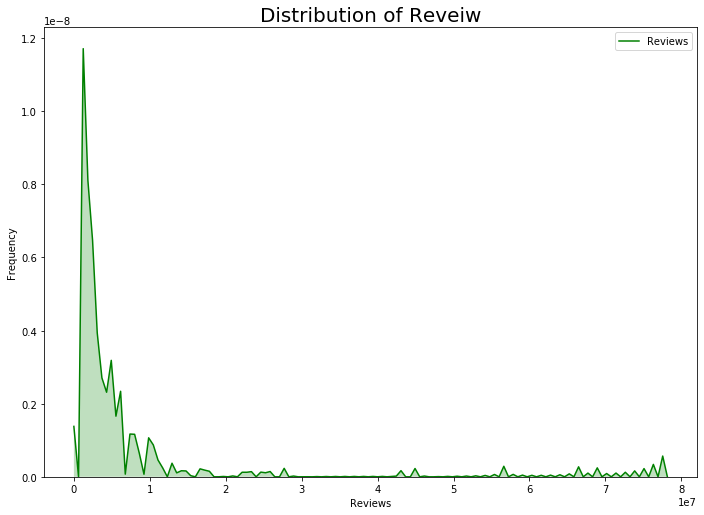

In [83]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

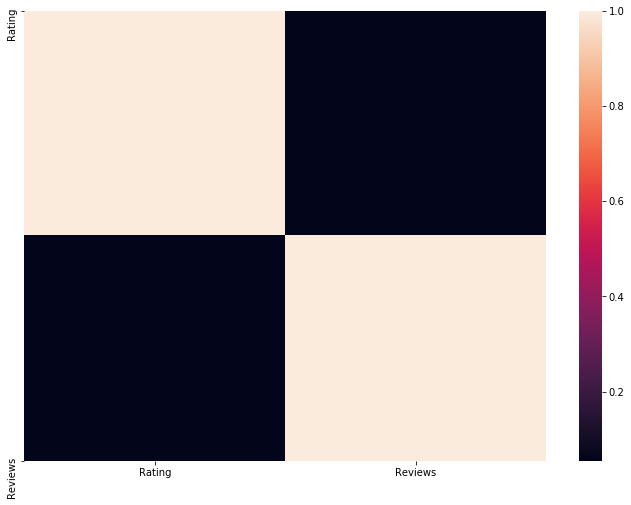

In [84]:
sns.heatmap(data.corr())

In [85]:
data["Reviews"].max()

78158306

In [86]:
max_review=data[data["Reviews"]==max(data["Reviews"])]
max_review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,4


In [87]:
data[data["Reviews"]>=20000000]["App"].count()

11

In [88]:
# Reviews with App Name

In [89]:
max_reviews=data[data['Reviews']>=20000000]
max_reviews=max_reviews.sort_values(by="Reviews", ascending=False)
max_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,4
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,4
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,4
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,3
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,4
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,4
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,4
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,4
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,4
1660,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,4


In [90]:
# max reviews with category
max_reviews.Category.value_counts()

GAME             4
TOOLS            2
COMMUNICATION    2
SOCIAL           2
VIDEO_PLAYERS    1
Name: Category, dtype: int64

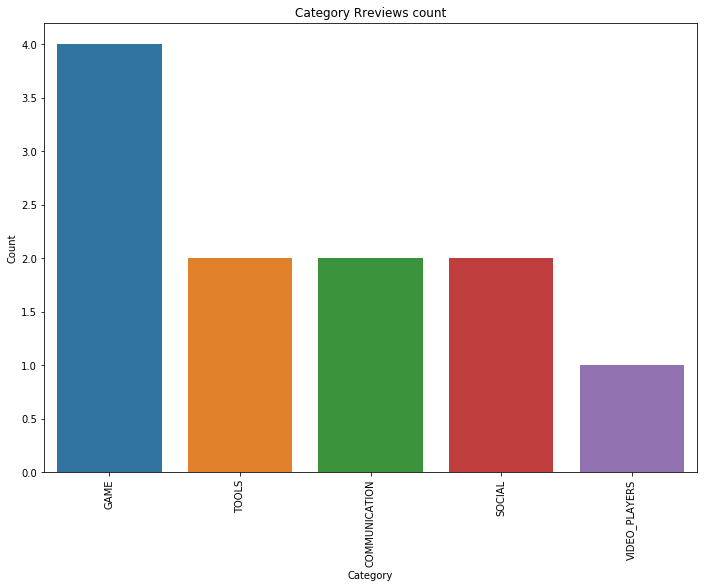

In [91]:
sns.barplot(x=max_reviews['Category'].value_counts().index,y=max_reviews['Category'].value_counts().values)

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Rreviews count")
plt.xticks(rotation=90)
plt.show()

In [92]:
# Gaming Category has the max reviews

In [93]:
max_reviews.groupby("Category")["Reviews"].sum().sort_values()

Category
VIDEO_PLAYERS     25655305
TOOLS             67817525
GAME             118174172
COMMUNICATION    125762163
SOCIAL           144735619
Name: Reviews, dtype: int32

In [94]:
# max_reviews with good rating
max_reviews[max_reviews['Rating']>=4.0]["Rating"].count()

11

In [95]:
max_reviews[max_reviews['Rating']>=4]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,4
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,4
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,4
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,3
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,4
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,4
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,4
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,4
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,4
1660,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,4


In [96]:
# this mean all APP with MAX Reviews are highly rated

In [97]:
max_reviews.groupby("Rating")["Reviews"].count()

Rating
4.0    1
4.1    1
4.3    1
4.4    2
4.5    2
4.6    2
4.7    2
Name: Reviews, dtype: int64

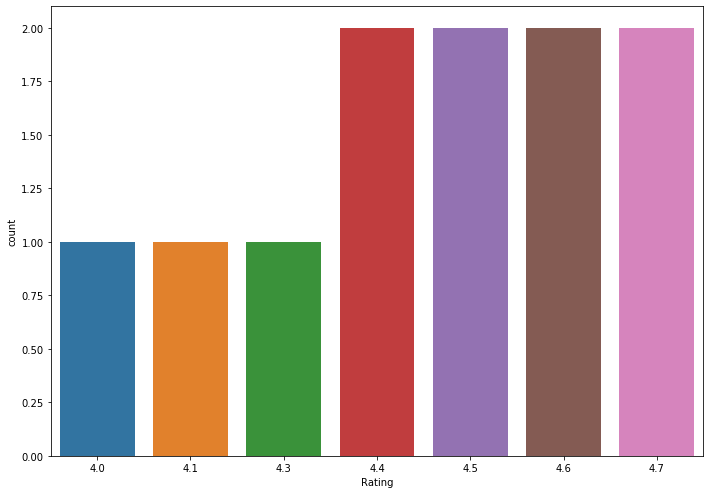

In [98]:
sns.countplot(max_reviews.Rating)

In [99]:
# Minimum Reviews

In [100]:
min_review=data[data['Reviews']<30]
min_review=min_review[min_review["Reviews"]>5]
min_review["App"].count()

1028

In [101]:
# 594 App with 0 reviews

In [102]:
min_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
17,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.500000,27,17M,"10,000+",Free,0,Everyone,Art & Design,"November 7, 2017",1.0,2.3 and up,4
44,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,4.200000,26,12M,"10,000+",Free,0,Everyone,Art & Design,"January 3, 2018",1.0.0,4.1 and up,4
128,Makeup Videos,BEAUTY,3.800000,9,3.4M,"5,000+",Free,0,Everyone,Beauty,"June 7, 2018",1.0,4.0 and up,3
132,Eyeliner step by step 2018,BEAUTY,4.300000,18,3.2M,"5,000+",Free,0,Everyone,Beauty,"June 1, 2018",1.2.13,4.0.3 and up,4
227,Y! Mobile menu,BUSINESS,4.175052,9,1.2M,"100,000+",Free,0,Everyone,Business,"April 9, 2018",1.0.5,6.0 and up,4


In [103]:
min_review.Category.value_counts()

FAMILY                 232
TOOLS                  102
BUSINESS                74
MEDICAL                 69
GAME                    48
LIFESTYLE               47
PERSONALIZATION         42
PRODUCTIVITY            41
COMMUNICATION           35
SPORTS                  35
BOOKS_AND_REFERENCE     31
FINANCE                 31
NEWS_AND_MAGAZINES      29
SOCIAL                  24
TRAVEL_AND_LOCAL        23
HEALTH_AND_FITNESS      22
MAPS_AND_NAVIGATION     18
DATING                  18
PHOTOGRAPHY             17
VIDEO_PLAYERS           15
SHOPPING                13
EVENTS                  13
LIBRARIES_AND_DEMO      13
AUTO_AND_VEHICLES        9
ART_AND_DESIGN           5
WEATHER                  5
HOUSE_AND_HOME           4
FOOD_AND_DRINK           3
BEAUTY                   3
PARENTING                3
EDUCATION                2
COMICS                   2
Name: Category, dtype: int64

In [104]:
# people don't like to review Business app

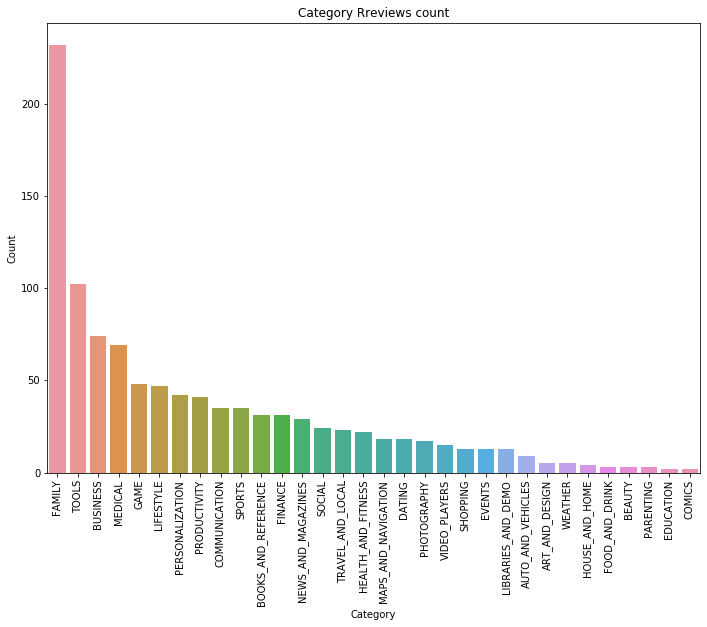

In [105]:
sns.barplot(x=min_review['Category'].value_counts().index,y=min_review['Category'].value_counts().values)

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Rreviews count")
plt.xticks(rotation=90)
plt.show()

In [106]:
# minimum reviews with highest rtings 
min_review[min_review["Rating"]==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,5
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,5
1030,Prosperity,EVENTS,5.0,16,2.3M,100+,Free,0,Everyone,Events,"July 9, 2018",1.14,2.0 and up,5
1547,Eternal life,LIBRARIES_AND_DEMO,5.0,26,2.5M,"1,000+",Free,0,Everyone,Libraries & Demo,"May 24, 2018",1.0,1.6 and up,5
2527,BP Journal - Blood Pressure Diary,MEDICAL,5.0,6,26M,"1,000+",Free,0,Everyone,Medical,"May 25, 2018",1.0.32,4.4 and up,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,South Florida AA Meetings,LIFESTYLE,5.0,10,21M,"1,000+",Free,0,Everyone,Lifestyle,"May 24, 2018",2.18,4.1 and up,5
10611,"Beacon Baptist Jupiter, FL",LIFESTYLE,5.0,14,2.6M,100+,Free,0,Everyone,Lifestyle,"October 13, 2017",2.4,4.0.3 and up,5
10659,FN,BUSINESS,5.0,14,3.3M,50+,Free,0,Everyone,Business,"February 1, 2018",1.0,4.0 and up,5
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,5


In [107]:
min_review[min_review["Rating"]==5]["Category"].value_counts()

FAMILY                 21
LIFESTYLE              12
BUSINESS                6
GAME                    6
TOOLS                   5
SOCIAL                  3
MEDICAL                 2
HEALTH_AND_FITNESS      2
SPORTS                  2
BOOKS_AND_REFERENCE     2
PRODUCTIVITY            2
LIBRARIES_AND_DEMO      2
NEWS_AND_MAGAZINES      2
SHOPPING                2
EVENTS                  2
PHOTOGRAPHY             1
PERSONALIZATION         1
TRAVEL_AND_LOCAL        1
DATING                  1
COMICS                  1
FINANCE                 1
COMMUNICATION           1
Name: Category, dtype: int64

In [108]:
# minimum reviews with lowest ratings 
min_review[min_review["Rating"]<2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
4522,Q-Tech Companion App,FOOD_AND_DRINK,1.8,17,3.1M,"10,000+",Free,0,Everyone,Food & Drink,"March 8, 2017",1.6.3,4.4 and up,1
5736,A&W Restaurants,FOOD_AND_DRINK,1.7,14,13M,"1,000+",Free,0,Everyone,Food & Drink,"June 6, 2018",2.7.0,4.1 and up,1
5941,Loreal - BA Makeup,TOOLS,1.9,8,6.7M,"1,000+",Free,0,Everyone,Tools,"April 18, 2018",1.1.1,4.0.3 and up,1
6135,BG TV App,FAMILY,1.7,6,2.9M,100+,Free,0,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up,1
6685,BR Chat Bot,SOCIAL,1.9,16,2.6M,"1,000+",Free,0,Everyone,Social,"June 30, 2016",1.0,4.0 and up,1
6948,Bitcoin BX Thailand PRO,FINANCE,1.7,21,21M,100+,Paid,$4.99,Everyone,Finance,"October 22, 2017",5.0,4.0.3 and up,1
7633,Co Checker,TOOLS,1.9,12,2.0M,"1,000+",Free,0,Everyone,Tools,"October 20, 2017",1.8.6,4.3 and up,1
7636,Co-op Connections,SHOPPING,1.6,8,18M,"1,000+",Free,0,Everyone,Shopping,"May 3, 2018",1.5,4.1 and up,1
7677,Hercules CP Mobile,TOOLS,1.4,20,4.1M,"1,000+",Free,0,Everyone,Tools,"July 6, 2018",2.1.5,4.3 and up,1
8838,DS-20000S,PRODUCTIVITY,1.8,12,14M,"1,000+",Free,0,Everyone,Productivity,"August 3, 2018",1.2.2,4.1 and up,1


In [109]:
min_review[min_review["Rating"]<2]["Category"].value_counts()

TOOLS             4
FOOD_AND_DRINK    2
VIDEO_PLAYERS     1
FAMILY            1
SHOPPING          1
SOCIAL            1
FINANCE           1
PRODUCTIVITY      1
Name: Category, dtype: int64

In [110]:
# as we can see that max Rating is 4.19 that is the mean of the Rating column in the data set that is in the starting the minimum Reviews has NAN value which is after word fill with the mean

In [111]:
#reviews with category 

In [112]:
cat_review=data.groupby('Category')['Reviews'].count()
#sum and display of paid products for the filtered area in terms of categorical
d1=pd.DataFrame(cat_review.index,columns=['Category'])
d2=pd.DataFrame(cat_review.values,columns=['Reviews_count'])
data_cat_review=pd.concat([d1,d2],axis=1)
data_cat_review=data_cat_review.sort_values(by='Reviews_count',ascending=False)
data_cat_review.reset_index().head()

,index,Category,Reviews_count
0,11,FAMILY,1828
1,14,GAME,959
2,29,TOOLS,825
3,4,BUSINESS,420
4,20,MEDICAL,395


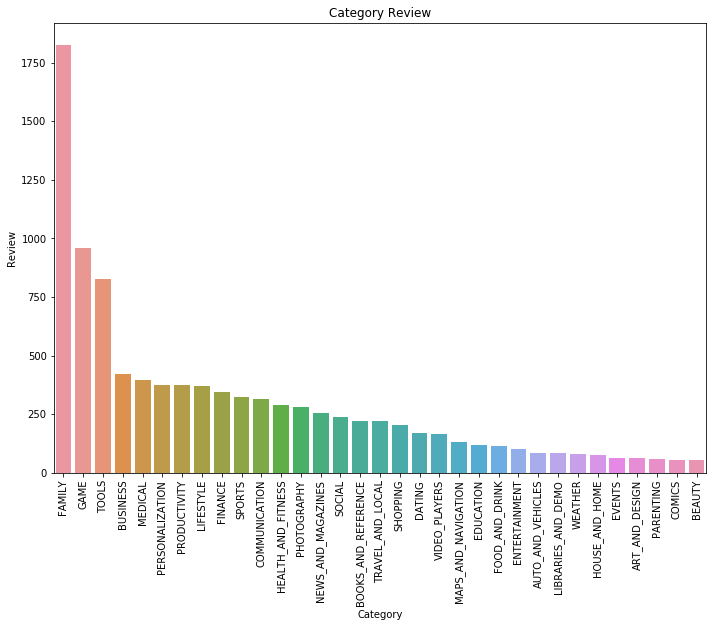

In [113]:
sns.barplot(x=data_cat_review['Category'],y=data_cat_review['Reviews_count'])
plt.xlabel("Category")
plt.ylabel("Review")
plt.title("Category Review")
plt.xticks(rotation=90)
plt.show()

In [114]:
# rating and review

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

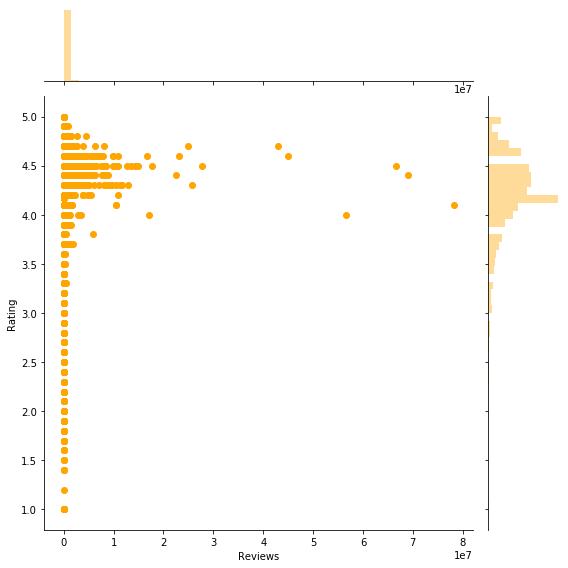

In [115]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,size = 8);

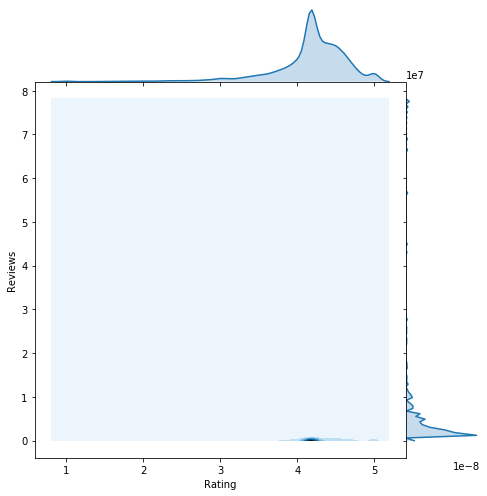

In [116]:
# Show the joint distribution using kernel density estimation
sns.jointplot(data.Rating,data.Reviews, kind="kde", height=7, space=0)
plt.show()

Text(0.5, 1.0, 'Rating VS Reveiws')

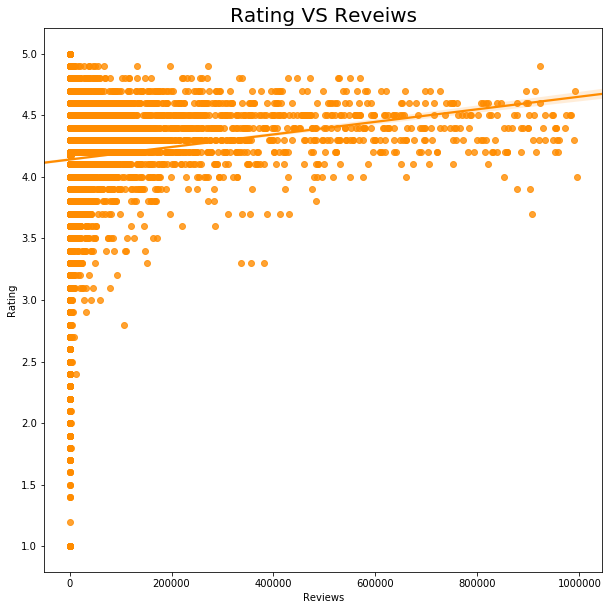

In [117]:
#
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

In [118]:
rate_review=data[data["Rating"]==5]
rate_review=rate_review[data["Reviews"]>40]

rate_review

#sns.distplot(rate_review.Reviews)

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
5196,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43,2.3M,100+,Free,0,Everyone,News & Magazines,"June 22, 2018",1.0,4.4 and up,5
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2.8M,100+,Free,0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up,5
5852,Quran Khmer Offline AY,FAMILY,5.0,41,4.0M,"1,000+",Free,0,Everyone,Education,"December 13, 2017",10.6,4.2 and up,5
6823,Barisal University App-BU Face,FAMILY,5.0,100,10M,"1,000+",Free,0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up,5
7506,CL REPL,TOOLS,5.0,47,17M,"1,000+",Free,0,Everyone,Tools,"April 10, 2018",1.0.19,4.1 and up,5
7842,CS & IT Interview Questions,FAMILY,5.0,43,3.3M,"1,000+",Free,0,Everyone,Education,"March 27, 2018",1.1,4.2 and up,5
8058,Oración CX,LIFESTYLE,5.0,103,3.8M,"5,000+",Free,0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up,5
9496,Master E.K,FAMILY,5.0,90,Varies with device,"1,000+",Free,0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up,5
9517,Ek Vote,PRODUCTIVITY,5.0,43,6.2M,500+,Free,0,Everyone,Productivity,"November 7, 2017",1.1,4.0.3 and up,5
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3M,"1,000+",Free,0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up,5


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

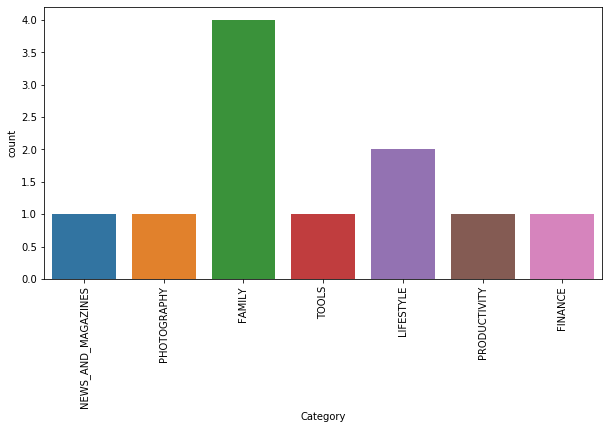

In [119]:
plt.figure(figsize=(10,5))

sns.countplot(rate_review.Category)
plt.xticks(rotation=90)


In [120]:
sns.factorplot

<function seaborn.categorical.factorplot(*args, **kwargs)>

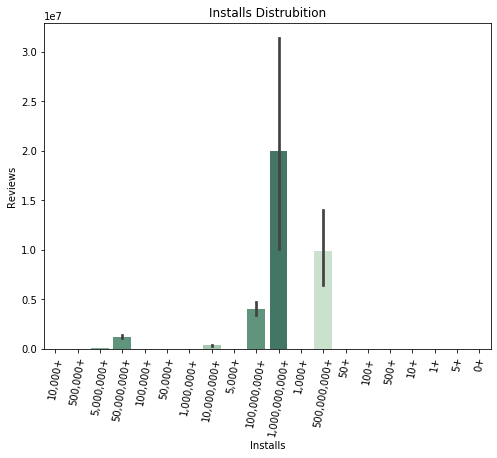

In [121]:
#histogram
plt.figure(figsize=(8,6))
sns.barplot(x=data['Installs'],y=data.Reviews,color='b',palette=sns.color_palette("ch:2.5,-.2,dark=.3"));
plt.title("Installs Distrubition")
plt.xticks(rotation=80)
plt.show()

In [122]:
#Size

In [123]:
data['Size'] = data['Size'].astype('str') 

In [124]:
data['Size'].replace('Varies with device', np.nan , inplace = True)

In [140]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

AttributeError: Can only use .str accessor with string values!

In [141]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [142]:
data["Size"].isnull().sum()

0

In [143]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

In [144]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


C:\Users\Swati Gupta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


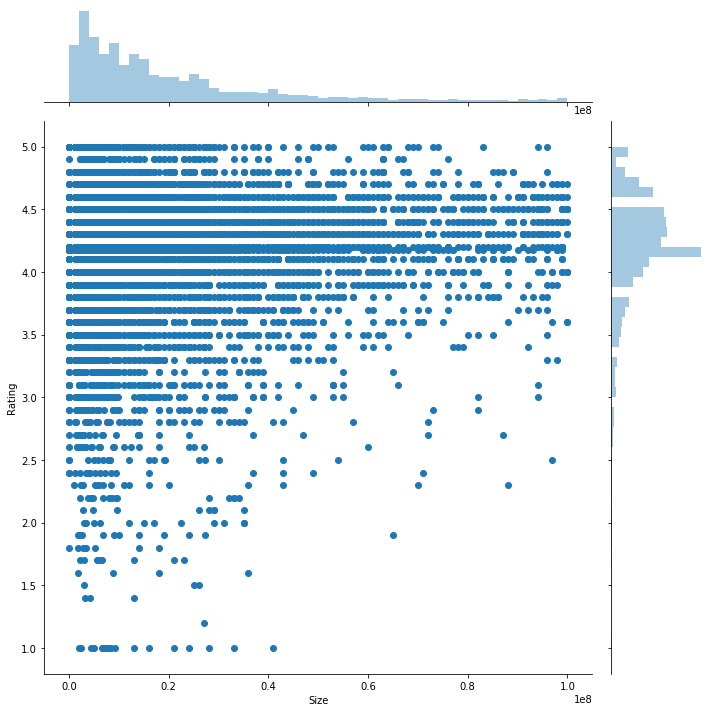

In [145]:
rcParams['figure.figsize'] = (5, 5)
sns.jointplot(x = 'Size', y = 'Rating', data = data, size = 10 )
plt.show()

In [146]:
data['Size'] = data['Size'].astype('float') 


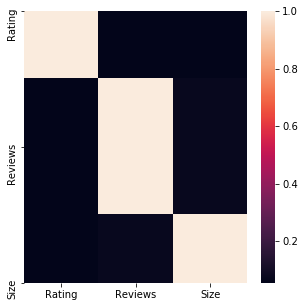

In [147]:
sns.heatmap(data.corr())

In [148]:
filter_data=data[data['Size']>int(data['Size'].mean())]
filter_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29000000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,4
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33000000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,4
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.400000,13880,28000000.0,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up,4
13,Mandala Coloring Book,ART_AND_DESIGN,4.600000,4326,21000000.0,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.700000,376223,24000000.0,"1,000,000+",Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up,4
10810,Fr Lupupa Sermons,BUSINESS,4.800000,19,21000000.0,100+,Free,0,Everyone,Business,"June 12, 2018",1.0,4.4 and up,4
10814,FR: My Secret Pets!,FAMILY,4.000000,785,31000000.0,"50,000+",Free,0,Teen,Entertainment,"June 3, 2015",1.3.1,3.0 and up,3
10824,Cardio-FR,MEDICAL,4.175052,67,82000000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up,4


In [149]:
max_size=data[data["Size"]==max(data["Size"])]
max_size["App"].count()


14

In [150]:
max_size.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
1080,Post Bank,FINANCE,4.5,60449,100000000.0,"1,000,000+",Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up,4
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up,3
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,4
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,"5,000,000+",Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up,4
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500+,Paid,$15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up,4


In [151]:
min_size=data[data["Size"]==min(data["Size"])]
min_size["App"].count()


1

In [152]:
min_size

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8.5,"50,000+",Free,0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up,4


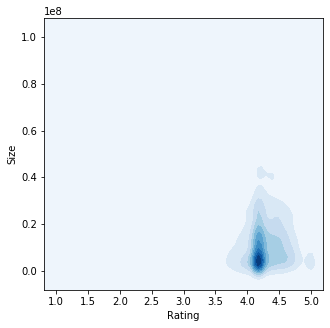

In [153]:
sns.kdeplot(data.Rating, data.Size,
                 cmap="Blues", shade=True)
plt.show()

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

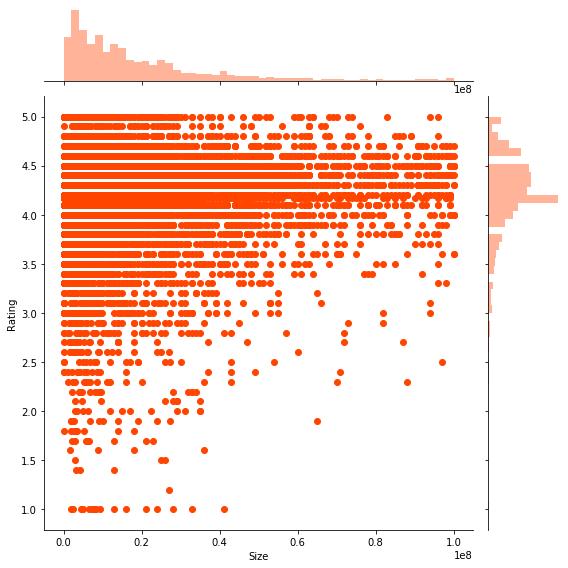

In [154]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, size = 8);

In [155]:
#instal

In [156]:
data["Installs"].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [157]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

Text(0.5, 1.0, 'Count of Apps ')

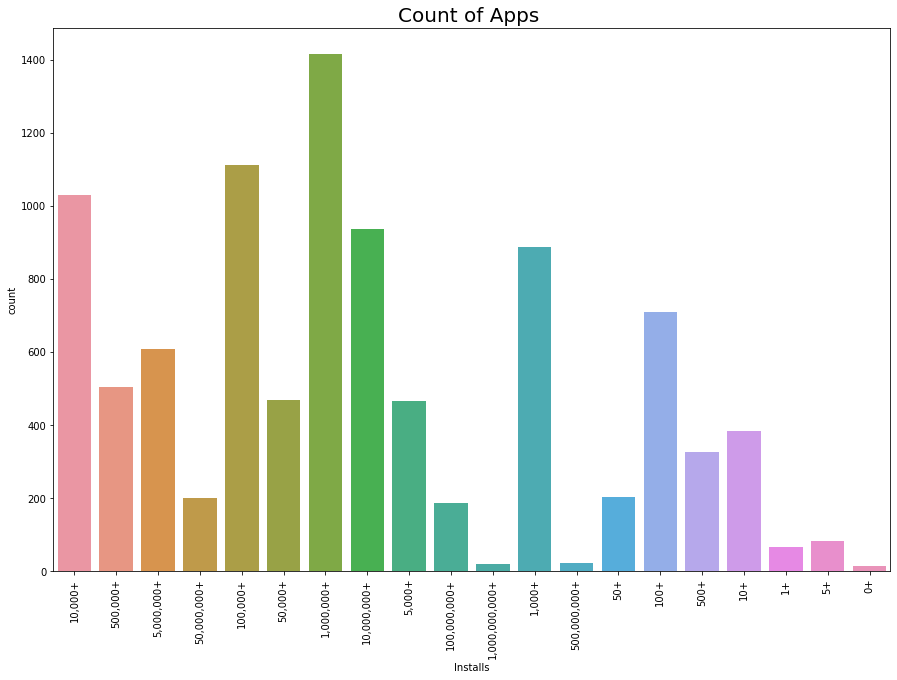

In [158]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sns.countplot(data['Installs'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps ', size = 20)

In [159]:
data['Installs'] = data['Installs'].map(lambda x: x.rstrip('+'))
data['Installs'] = data['Installs'].map(lambda x: ''.join(x.split(',')))

In [160]:
data.Installs = data.Installs.apply(lambda x: int(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [161]:
'''#data_instal=data
#data_instal=data_instal.loc[data_instal["Installs"]]
#data_instal
top_rate['Installs'] = top_rate['Installs'].map(lambda x: x.rstrip('+'))
top_rate['Installs'] = top_rate['Installs'].map(lambda x: ''.join(x.split(',')))
top_rate['Installs'] = top_rate['Installs'].astype('float') 

#sns.distplot(data_instal.Installs)'''

'#data_instal=data\n#data_instal=data_instal.loc[data_instal["Installs"]]\n#data_instal\ntop_rate[\'Installs\'] = top_rate[\'Installs\'].map(lambda x: x.rstrip(\'+\'))\ntop_rate[\'Installs\'] = top_rate[\'Installs\'].map(lambda x: \'\'.join(x.split(\',\')))\ntop_rate[\'Installs\'] = top_rate[\'Installs\'].astype(\'float\') \n\n#sns.distplot(data_instal.Installs)'

In [162]:
data.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [163]:
#Sorting the values
sorted_value = sorted(list(data['Installs'].unique()))

In [164]:
data['Installs'].replace(sorted_value, range(0, len(sorted_value), 1), inplace = True)

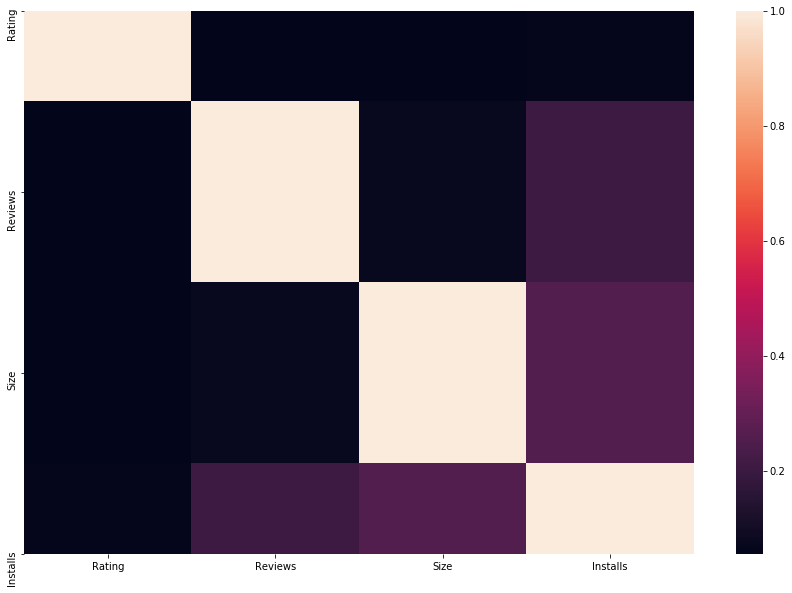

In [165]:
sns.heatmap(data.corr())

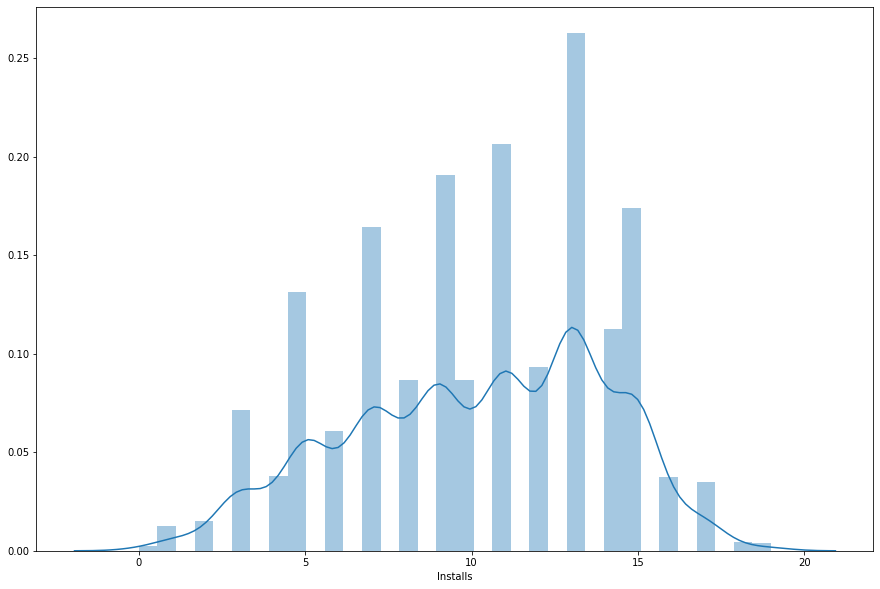

In [166]:
sns.distplot(data["Installs"])

In [167]:
# max int=stalls name 
data[data["Installs"]==max(data["Installs"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1.317515e+07,19,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,3
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1.125955e+07,19,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,3
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.125955e+07,19,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,4
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1.125955e+07,19,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,4
340,Gmail,COMMUNICATION,4.3,4604324,1.125955e+07,19,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,4
341,Hangouts,COMMUNICATION,4.0,3419249,1.125955e+07,19,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,3
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,1.125955e+07,19,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,4
865,Google Play Games,ENTERTAINMENT,4.3,7165362,2.304375e+07,19,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,4
1654,Subway Surfers,GAME,4.5,27722264,7.600000e+07,19,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,4
2544,Facebook,SOCIAL,4.1,78158306,1.597461e+07,19,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,4


In [168]:
top_rate.Installs.value_counts().sort_index()

1+           3
1,000+      37
10+         48
10,000+      1
100+       112
5+           8
5,000+       3
50+         32
500+        27
Name: Installs, dtype: int64

In [169]:
'''data_install_max = top_rate[top_rate["Installs"] > 1000]

data_install_max[['App', 'Category', 'Installs']]'''

'data_install_max = top_rate[top_rate["Installs"] > 1000]\n\ndata_install_max[[\'App\', \'Category\', \'Installs\']]'

In [170]:
data["Installs"]=data["Installs"].astype("float")

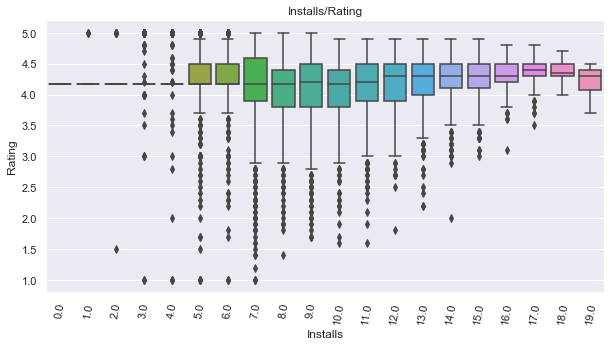

In [171]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(10,5))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=data)
plt.title("Installs/Rating")
plt.xticks(rotation=80)
plt.show()

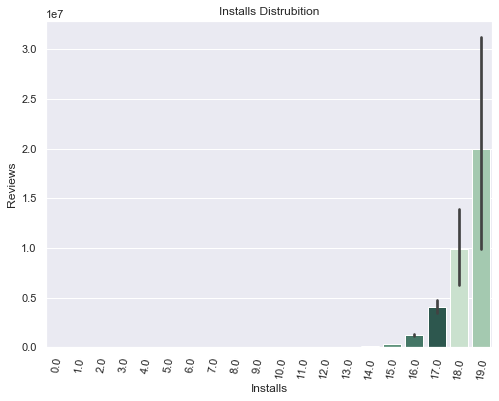

In [172]:
#histogram
plt.figure(figsize=(8,6))
sns.barplot(x=data['Installs'],y=data.Reviews,color='b',palette=sns.color_palette("ch:2.5,-.2,dark=.3"));
plt.title("Installs Distrubition")
plt.xticks(rotation=80)
plt.show()

Text(0.5, 1.0, 'Ratings VS Installs')

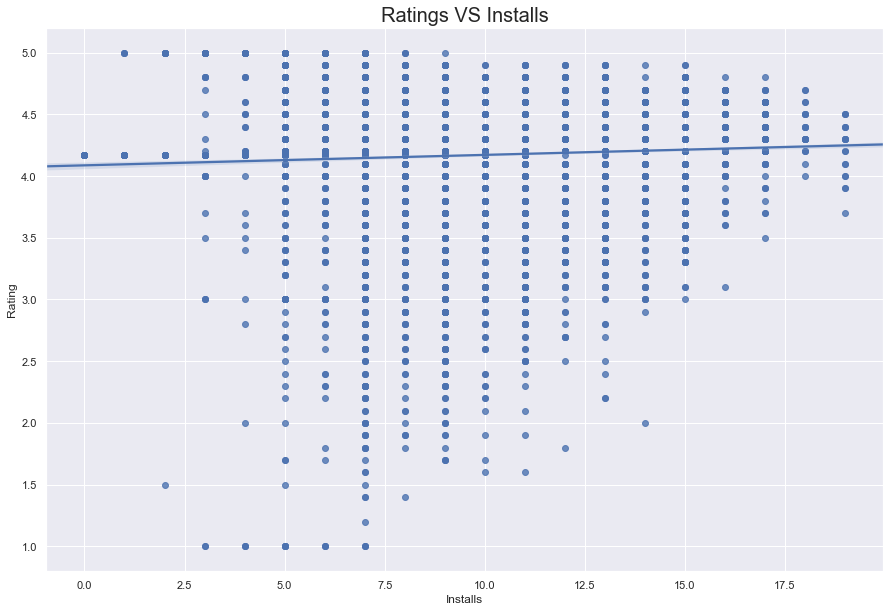

In [173]:
rcParams['figure.figsize'] = (15, 10)
sns.regplot(x = 'Installs', y = 'Rating', data = data)
plt.title("Ratings VS Installs", size = 20)

In [174]:
#Type

In [175]:
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

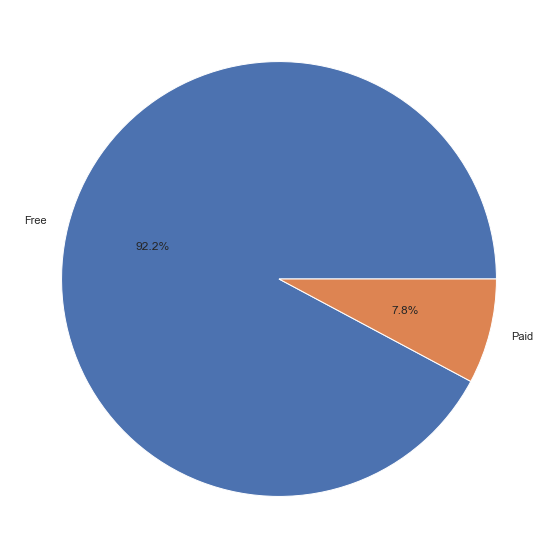

In [176]:
plt.pie(data.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')
plt.show()

In [177]:
paid_cat=data[data["Type"]=="Paid"]

In [178]:
paid_cat["Category"].value_counts()

FAMILY                 182
MEDICAL                 83
GAME                    82
PERSONALIZATION         80
TOOLS                   77
BOOKS_AND_REFERENCE     28
PRODUCTIVITY            28
COMMUNICATION           27
SPORTS                  24
LIFESTYLE               19
PHOTOGRAPHY             19
FINANCE                 17
HEALTH_AND_FITNESS      15
TRAVEL_AND_LOCAL        12
BUSINESS                12
WEATHER                  8
DATING                   6
MAPS_AND_NAVIGATION      5
VIDEO_PLAYERS            4
EDUCATION                4
SOCIAL                   3
AUTO_AND_VEHICLES        3
ART_AND_DESIGN           3
ENTERTAINMENT            2
FOOD_AND_DRINK           2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
PARENTING                2
LIBRARIES_AND_DEMO       1
EVENTS                   1
Name: Category, dtype: int64

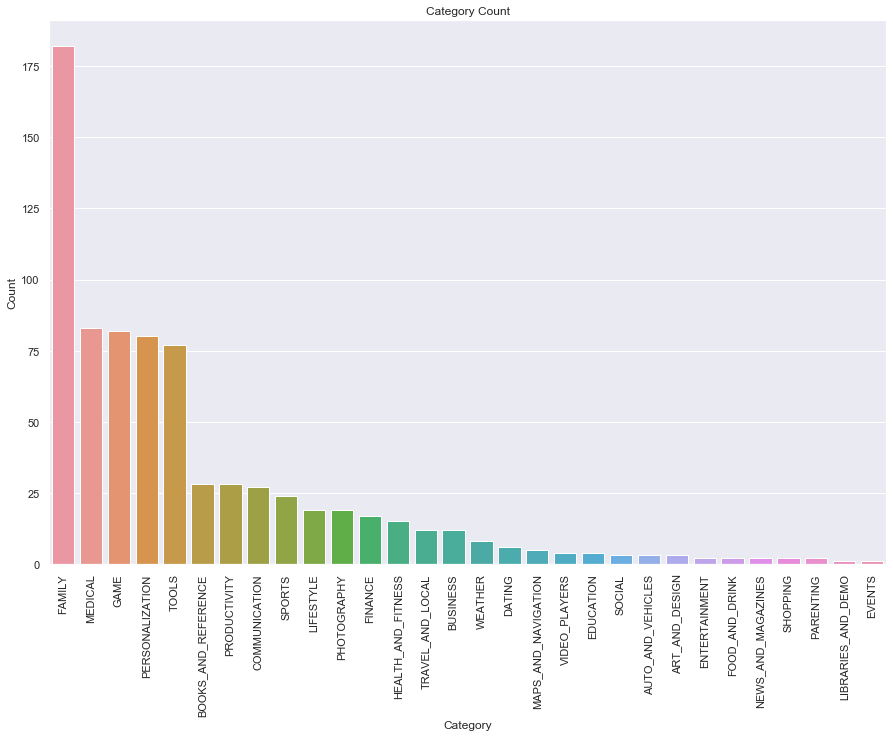

In [179]:
sns.barplot(x=paid_cat['Category'].value_counts().index,y=paid_cat['Category'].value_counts().values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Count")
plt.xticks(rotation=90)
plt.show()

In [180]:
top_rated_paid_cat=paid_cat[paid_cat["Rating"]==max(paid_cat.Rating)]
top_rated_paid_cat["App"].count()

28

In [181]:
top_rated_paid_cat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
2262,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,23000000.0,5.0,Paid,$2.99,Everyone,Medical,"April 20, 2018",1.0,4.1 and up,5
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1200000.0,6.0,Paid,$2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up,5
3957,ADS-B Driver,TOOLS,5.0,2,6300000.0,5.0,Paid,$1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up,5
4452,P-Home for KLWP,PERSONALIZATION,5.0,4,12000000.0,5.0,Paid,$0.99,Everyone,Personalization,"May 15, 2018",v2018.May.15.14,5.0 and up,5
4477,Android P Style Icon Pack,PERSONALIZATION,5.0,1,60000000.0,5.0,Paid,$0.99,Everyone,Personalization,"June 16, 2018",1.0,4.1 and up,5


In [182]:
free_cat=data[data["Type"]=="Free"]

In [183]:
free_cat["Category"].value_counts()

FAMILY                 1646
GAME                    877
TOOLS                   748
BUSINESS                408
LIFESTYLE               350
PRODUCTIVITY            346
FINANCE                 328
MEDICAL                 312
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           288
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             262
NEWS_AND_MAGAZINES      252
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                200
BOOKS_AND_REFERENCE     193
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     126
EDUCATION               115
FOOD_AND_DRINK          110
ENTERTAINMENT           100
AUTO_AND_VEHICLES        82
LIBRARIES_AND_DEMO       82
HOUSE_AND_HOME           74
WEATHER                  71
EVENTS                   63
ART_AND_DESIGN           60
PARENTING                58
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

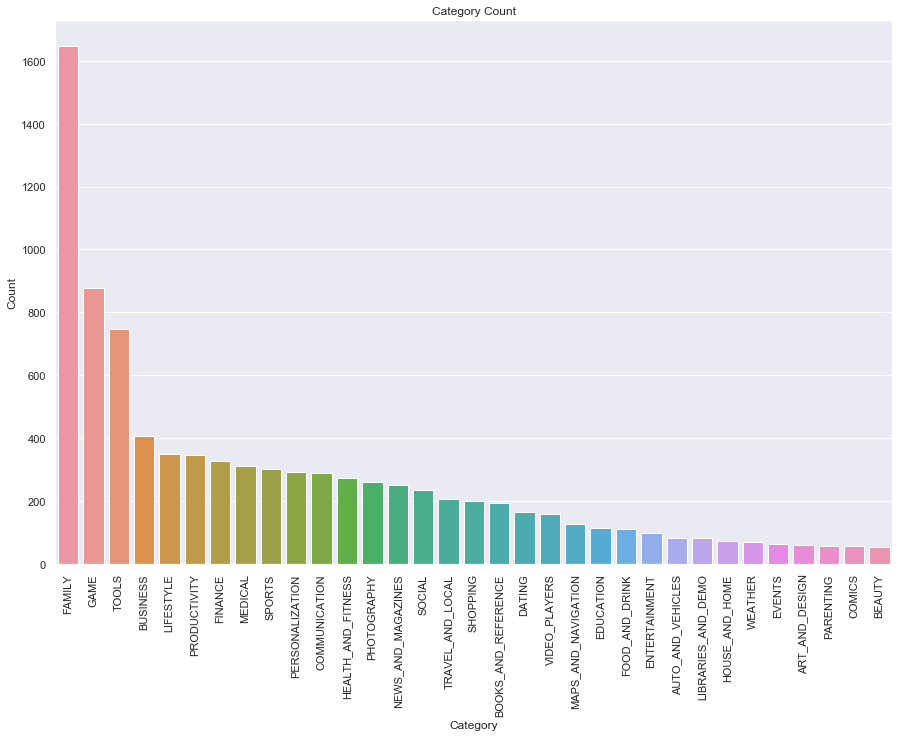

In [184]:
sns.barplot(x=free_cat['Category'].value_counts().index,y=free_cat['Category'].value_counts().values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Count")
plt.xticks(rotation=90)
plt.show()

In [185]:
top_rated_free_cat=free_cat[free_cat["Rating"]==max(free_cat.Rating)]
top_rated_free_cat["App"].count()

243

In [186]:
top_rated_free_cat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000000.0,7.0,Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,5
612,American Girls Mobile Numbers,DATING,5.0,5,4400000.0,7.0,Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,5
615,Awake Dating,DATING,5.0,2,70000000.0,5.0,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,5
633,Spine- The dating app,DATING,5.0,5,9300000.0,6.0,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,5
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000000.0,5.0,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,5


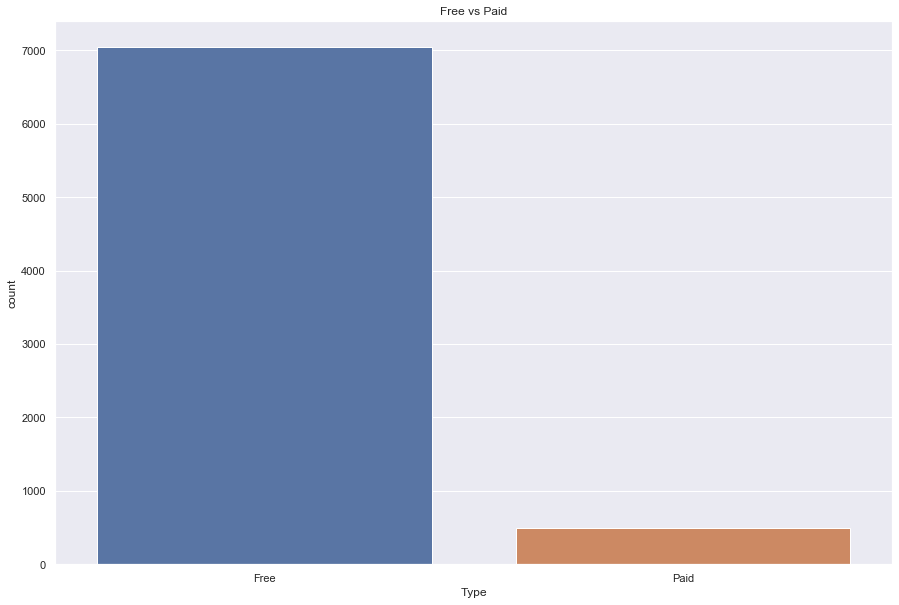

In [187]:
sns.countplot(data[data['Reviews']>15].Type)
plt.title("Free vs Paid")
plt.show()

In [188]:
data[(data['Reviews']>15)&(data['Type']=='Paid')]["App"].count()

499

In [189]:
data[(data['Reviews']>15)&(data['Type']=='Paid')]["App"].head()

234    TurboScan: scan documents and receipts in PDF
235                   Tiny Scanner Pro: PDF Doc Scan
427                               Puffin Browser Pro
476                        Moco+ - Chat, Meet People
477                                       Calculator
Name: App, dtype: object

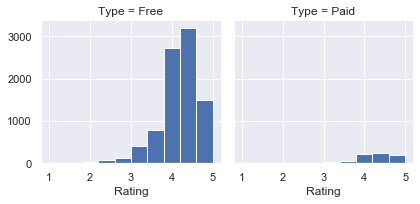

In [190]:

g=sns.FacetGrid(data,col="Type")
g=g.map(plt.hist,"Rating")
plt.show()

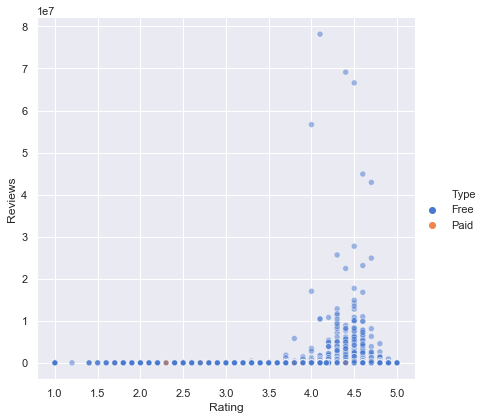

In [191]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Rating", y="Reviews", hue="Type", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
plt.show()

In [192]:
from bokeh.plotting import figure
plot = figure(tools="box_select,lasso_select")
plot.circle(y= "Rating",x = "Reviews",color = "black",
            selection_color = "orange",
            nonselection_fill_alpha = 0.2,
           nonselection_fill_color = "blue")
plt.show()

In [193]:
data[(data['Type']!='Free')&(data['Type']!='Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new


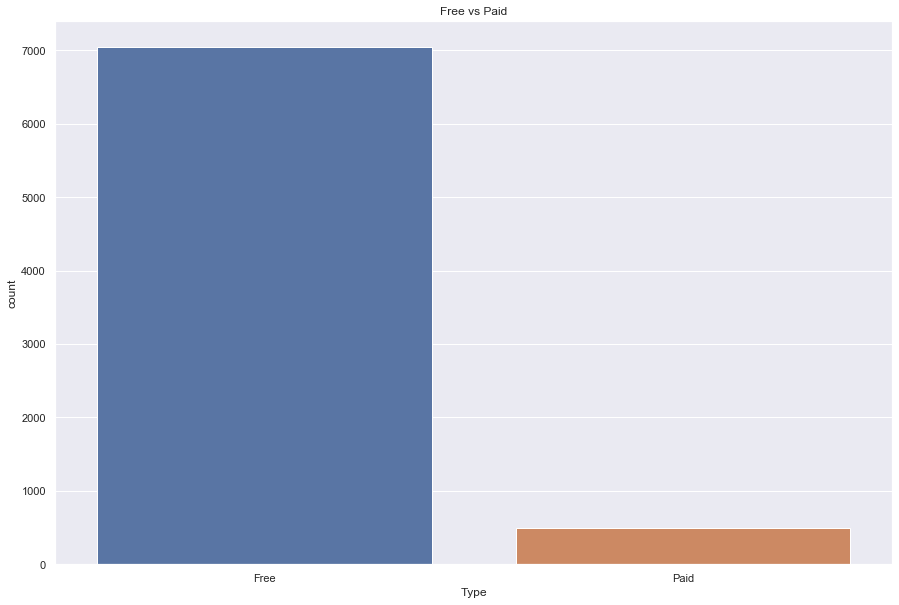

In [194]:
sns.countplot(data[data['Reviews']>15].Type)
plt.title("Free vs Paid")
plt.show()

In [195]:
data['Type'] = pd.get_dummies(data['Type'])

In [196]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,9.0,1,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,12.0,1,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,14.0,1,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,16.0,1,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,11.0,1,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


# Price

In [197]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [198]:
data['Price'] = data['Price'].map(lambda x: x.lstrip('$').rstrip())

In [199]:
data.Price=data.Price.astype('float')

In [200]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,9.0,1,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,12.0,1,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,14.0,1,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,16.0,1,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,11.0,1,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [201]:
data.Price.max()

400.0

In [202]:
data.Price.describe()

count    9648.000000
mean        1.100193
std        16.861727
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [203]:
data[data["Price"]==max(data.Price)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,9.0,0,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,3


In [204]:
#filter_data[(filter_data['Reviews']>15)&(filter_data['Type']=='Paid')]
df_filter=data.groupby('Category')['Price'].sum()
#sum and display of paid products for the filtered area in terms of categorical
d1=pd.DataFrame(df_filter.index,columns=['Category'])
d2=pd.DataFrame(df_filter.values,columns=['Price'])
df_data_filter=pd.concat([d1,d2],axis=1)
df_data_filter=df_data_filter.sort_values(by='Price',ascending=False)
df_data_filter.head()

,Category,Price
12,FINANCE,2900.83
11,FAMILY,2398.87
18,LIFESTYLE,2360.87
20,MEDICAL,995.70
14,GAME,284.31


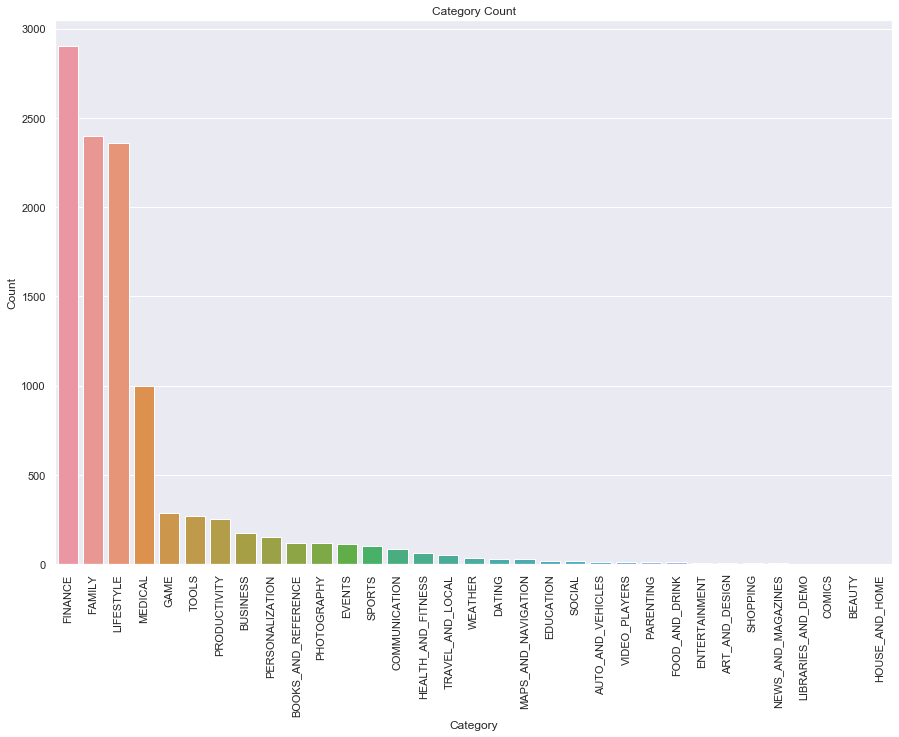

In [205]:
sns.barplot(x=df_data_filter['Category'],y=df_data_filter['Price'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Count")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, ' Price VS Rating')

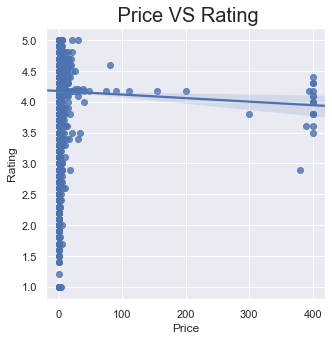

In [206]:
rcParams['figure.figsize'] = (5, 5)
sns.regplot(x = 'Price', y = 'Rating', data = data)
plt.title(" Price VS Rating", size = 20)

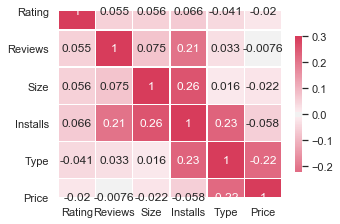

In [207]:
cmap = sns.diverging_palette(5, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

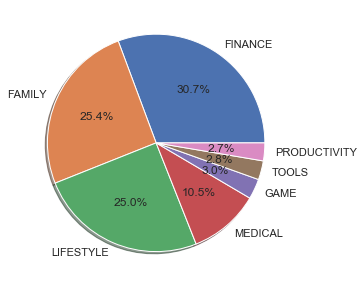

In [208]:
plt.figure(figsize=(5,5))
plt.pie(df_data_filter.Price[0:7], labels=df_data_filter.Category[0:7], autopct='%1.1f%%',shadow=True)
#ax.axis('Price')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.legend()
plt.show()

In [209]:
data.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Rating_new        16
dtype: int64

In [210]:
#Content Rating	

In [211]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Count of Apps ')

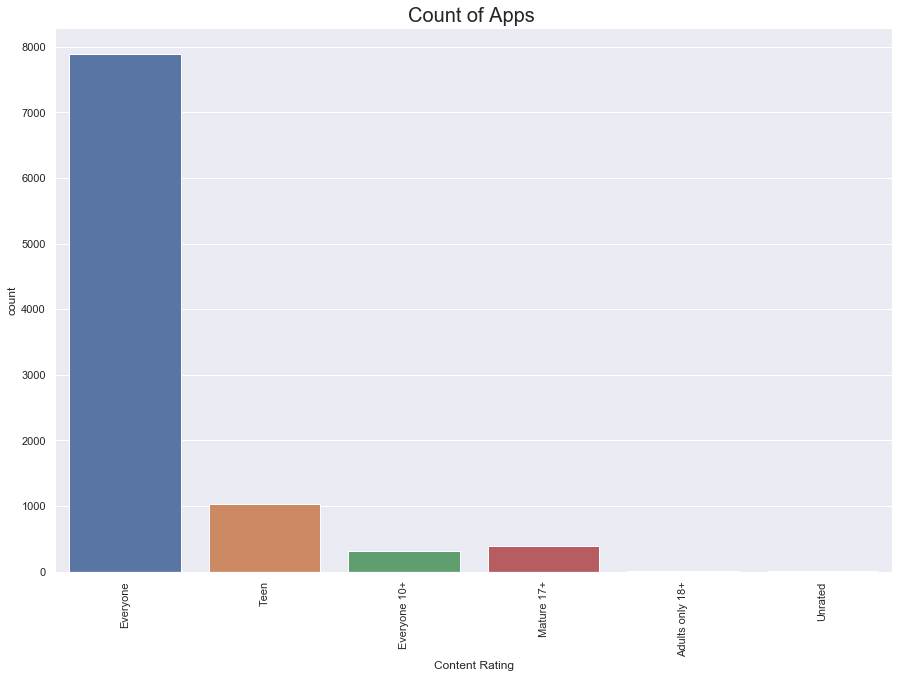

In [212]:
plt.rcParams['figure.figsize'] = (15, 10)
count_graph = sns.countplot(data['Content Rating'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps ', size = 20)

Text(0.5, 1.0, 'Content Rating VS Rating')

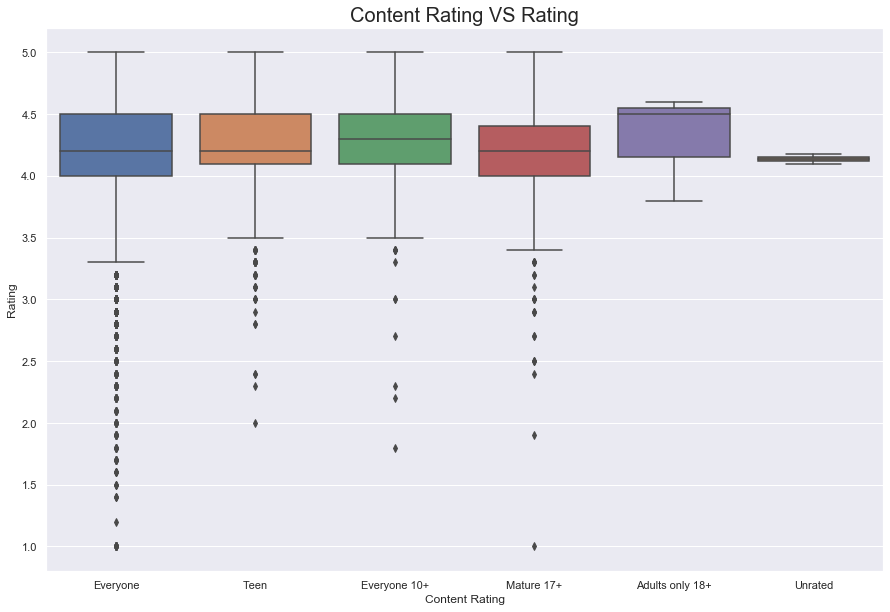

In [213]:
rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = 'Content Rating', y = 'Rating', data = data)
plt.title("Content Rating VS Rating", size = 20)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

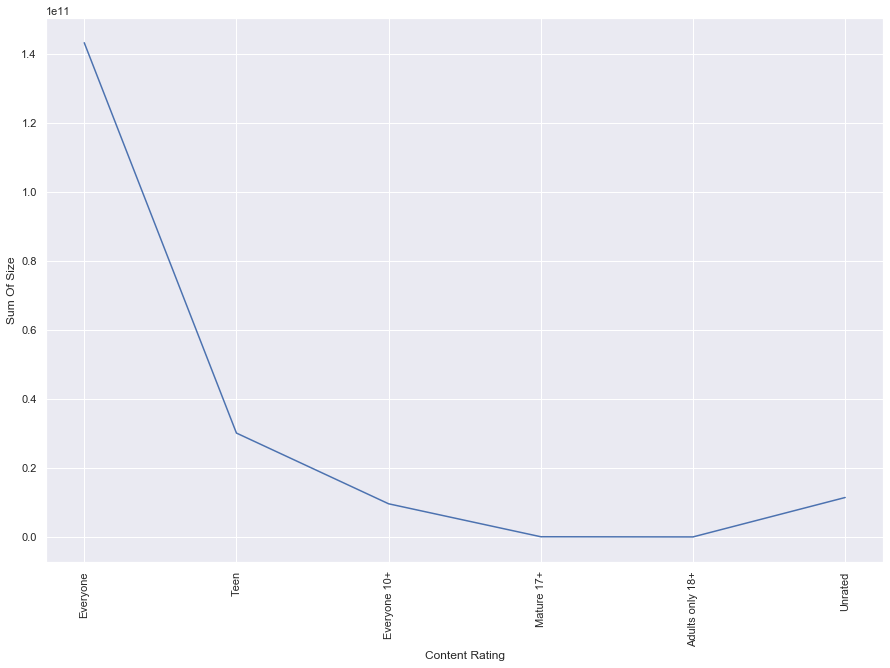

In [214]:
everyone=[]
teen=[]
everyone10=[]
mature17=[]
adults18=[]
unrates=[]

everyone.append(sum(data[(data['Content Rating']=="Everyone")].Size))
teen.append(sum(data[(data['Content Rating']=="Teen")].Size))
mature17.append(sum(data[(data['Content Rating']=="Mature 17+")].Size))
adults18.append(sum(data[(data['Content Rating']=="Adults only 18+")].Size))
unrates.append(sum(data[(data['Content Rating']=="Unrated")].Size))
everyone10.append(sum(data[(data['Content Rating']=="Everyone 10+")].Size))   
#data.groupby('Content Rating')['Size'].mean().values
plt.plot(data['Content Rating'].unique(),[everyone, teen, mature17, adults18, unrates, everyone10])
plt.xlabel('Content Rating')
plt.ylabel('Sum Of Size')
plt.xticks(rotation=90)
#plt.show()


In [215]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1, 'Box plot Rating VS Content Rating')

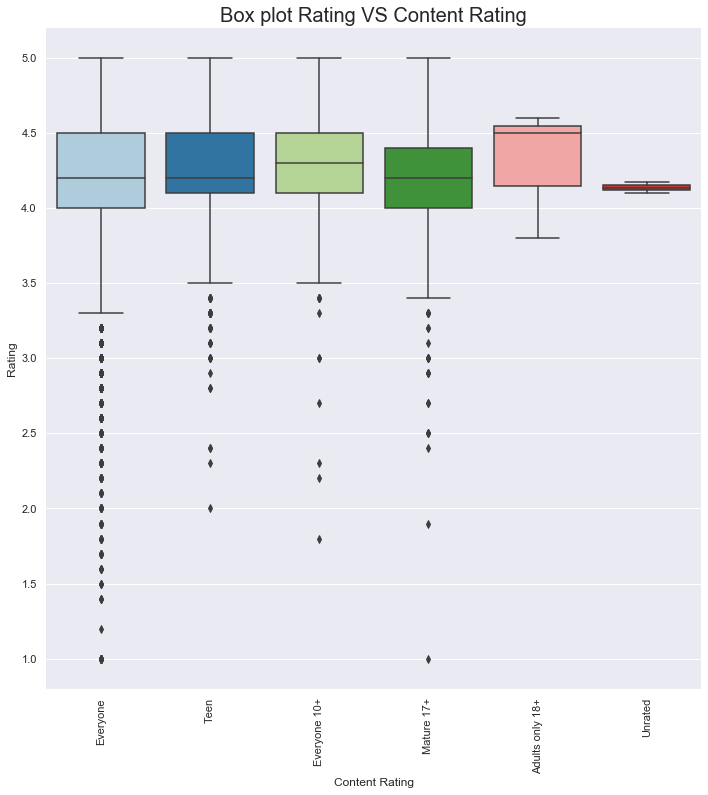

In [216]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

In [217]:
data[data['Content Rating']=='Unrated']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
7312,Best CG Photography,FAMILY,4.175052,1,2500000.0,6.0,1,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up,4
8266,DC Universe Online Map,TOOLS,4.100000,1186,6400000.0,10.0,1,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,4


In [218]:
##lastupdate


In [219]:
import time
import datetime
# Last Updated encoding
data['Last Updated'] = data['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [220]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,9.0,1,0.0,Everyone,Art & Design,1.515263e+09,1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,12.0,1,0.0,Everyone,Art & Design;Pretend Play,1.515955e+09,2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,14.0,1,0.0,Everyone,Art & Design,1.533062e+09,1.2.4,4.0.3 and up,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,16.0,1,0.0,Teen,Art & Design,1.528396e+09,Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,11.0,1,0.0,Everyone,Art & Design;Creativity,1.529433e+09,1.1,4.4 and up,4


In [221]:
'''data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()'''

"data['new'] = pd.to_datetime(data['Last Updated'])\ndata['new'].describe()"

In [222]:
'''# new format of  Last Updated
data['new'].max()'''

"# new format of  Last Updated\ndata['new'].max()"

In [223]:
#data['new'][0] -  data['new'].max()

In [224]:
#data['lastupdate'] = (data['new'] -  data['new'].max()).dt.days
#data['lastupdate'].head()

In [225]:
#plt.figure(figsize = (10,10))
#sns.regplot(x="lastupdate", y="Rating", color = 'lightpink',data=data );
#plt.title('Rating  VS Last Update( days ago )',size = 20)

In [226]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'])
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month

In [227]:
#Genres 

In [228]:
data["Genres"].unique

<bound method Series.unique of 0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 9648, dtype: object>

In [229]:
data["Genres"].value_counts()

Tools                          824
Entertainment                  560
Education                      509
Business                       420
Medical                        395
                              ... 
Trivia;Education                 1
Puzzle;Education                 1
Arcade;Pretend Play              1
Music & Audio;Music & Video      1
Entertainment;Education          1
Name: Genres, Length: 118, dtype: int64

In [230]:
len(data['Genres'].unique())

118

In [231]:
#Grouping to ignore sub-genre
data['Genres'] = data['Genres'].str.split(';').str[0]

In [232]:
app_genres=data.groupby("Genres")['App'].value_counts()
app_genres=pd.DataFrame(app_genres)
app_genres

App
Genres App                                
Action 2-Player Co-op Zombie Shoot       1
       211:CK Lite                       1
       AE Angry Chef                     1
       AE City Jump                      1
       AE Jewels                         1
...                                    ...
Word   Word Search                       1
       Word Search multilingual          1
       Words With Friends Classic        1
       Words With Friends – Play Free    1
       Wordscapes                        1

[9648 rows x 1 columns]

In [233]:
print(data['Genres'].unique())
print('\n', len(data['Genres'].unique()), 'genres')

['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']

 48 genres


Text(0.5, 1.0, 'Count of Apps')

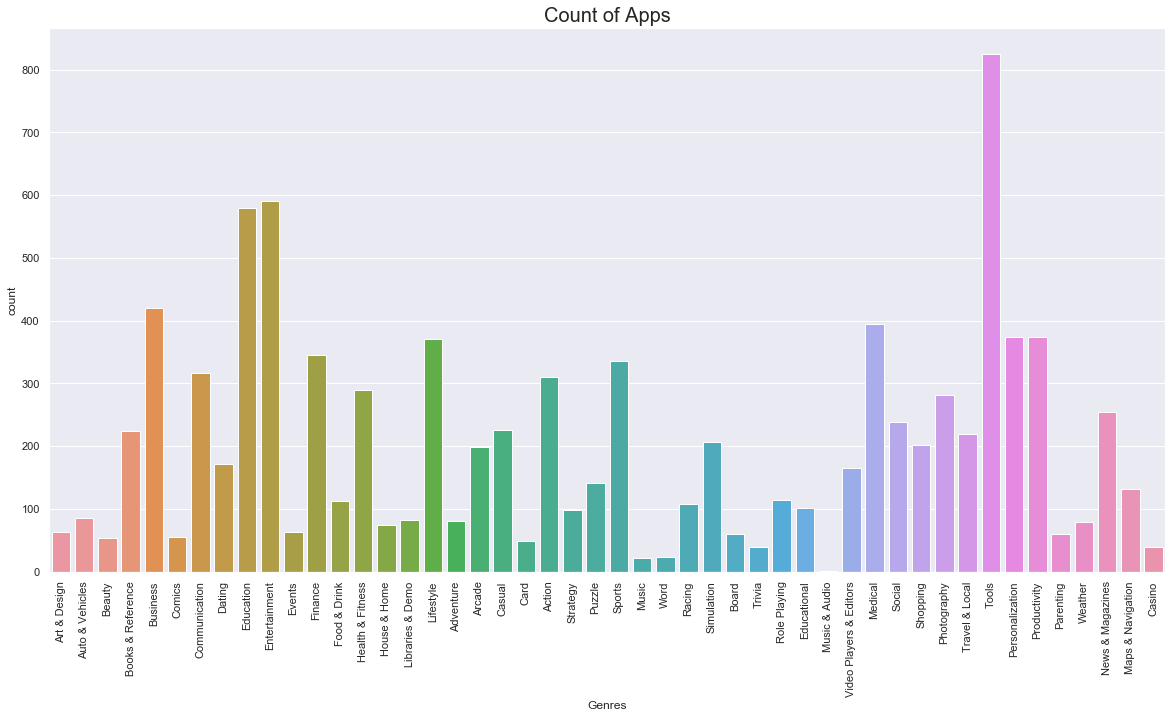

In [234]:
plt.rcParams['figure.figsize'] = (20, 10)
count_graph = sns.countplot(data['Genres'])
count_graph.set_xticklabels(count_graph.get_xticklabels(), rotation = 90)
count_graph
plt.title('Count of Apps', size = 20)

Text(0.5, 1.0, 'Rating VS Genres')

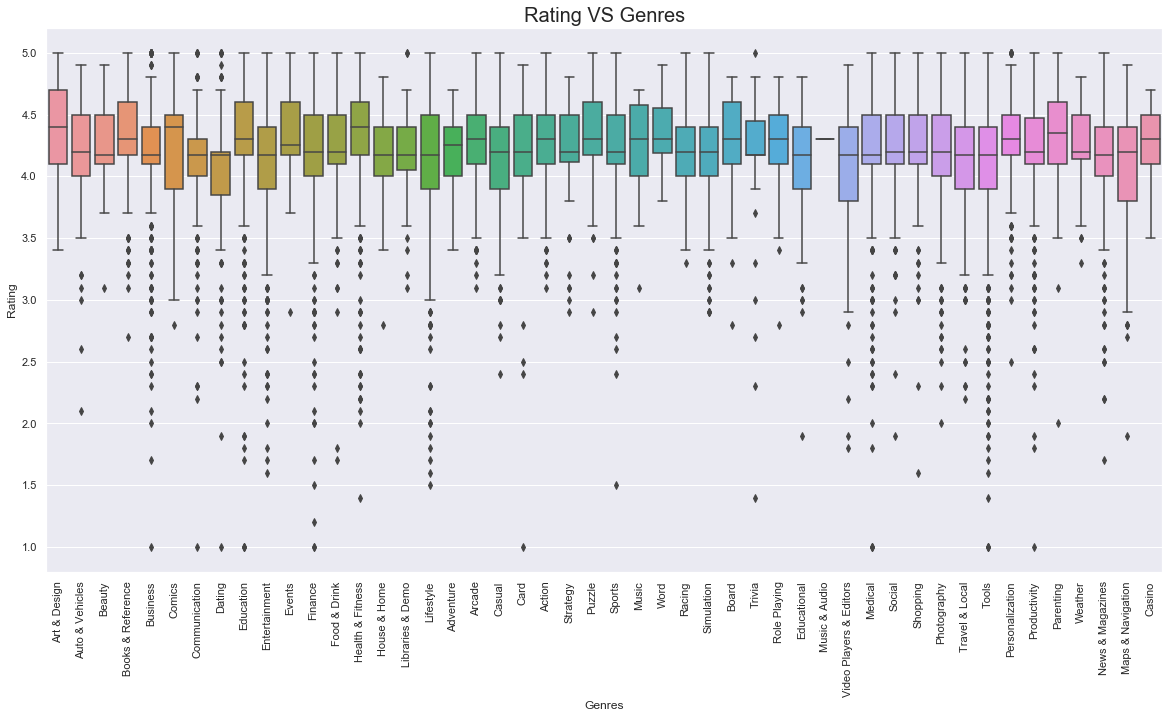

In [235]:
rcParams['figure.figsize'] = (20,10)
graph = sns.boxplot(x = 'Genres', y = 'Rating', data = data)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
graph
plt.title('Rating VS Genres', size = 20)

In [236]:
countplot=data.Genres.value_counts()

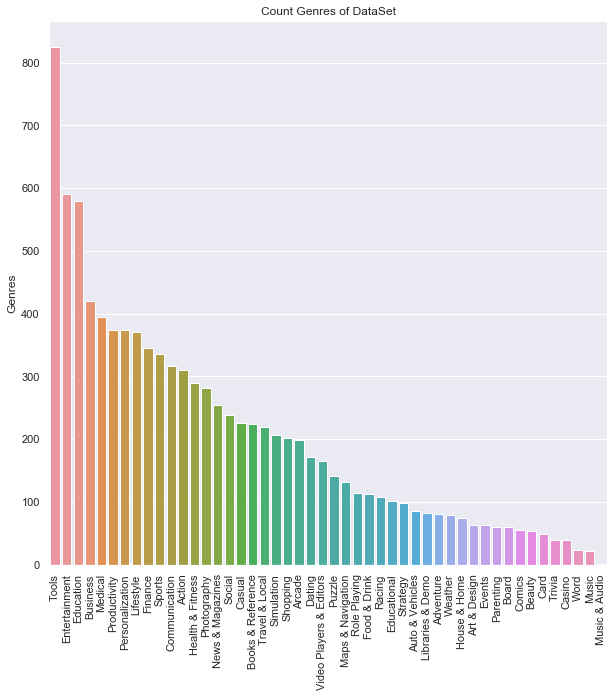

In [237]:
plt.figure(figsize=(10,10))
sns.barplot(x=countplot.index[:50],y=countplot[:50])
plt.xticks(rotation=90)
plt.title("Count Genres of DataSet")
plt.show()

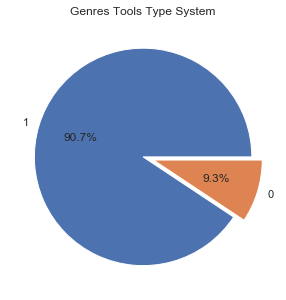

In [238]:
explode=[0,0.1]
labels=["Free","Paid"]
plt.figure(figsize=(5,5))
plt.pie(data[data['Genres']=='Tools'].Type.value_counts().values,labels=data[data['Genres']=='Tools'].Type.value_counts().index,explode=explode, autopct='%1.1f%%')
plt.title("Genres Tools Type System")
plt.show()

In [239]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,48.000000
mean,4.195043
std,0.087939
min,4.014485
25%,4.130576
50%,4.185002
75%,4.269175
max,4.359768


Text(0.5, 1, 'Boxenplot of Rating VS Genres')

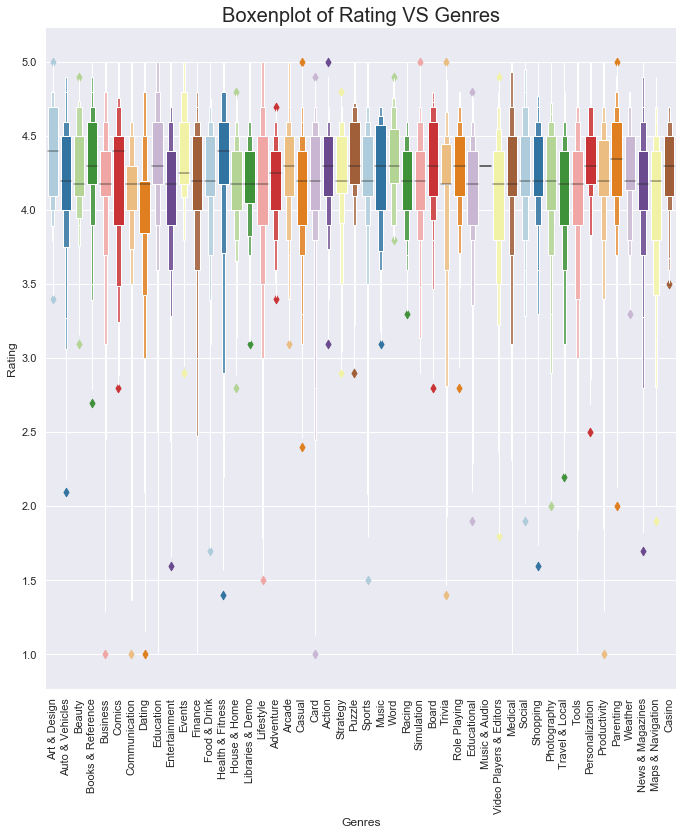

In [240]:
g = sns.catplot(x="Genres",y="Rating",data=data, kind="boxen", height = 10,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

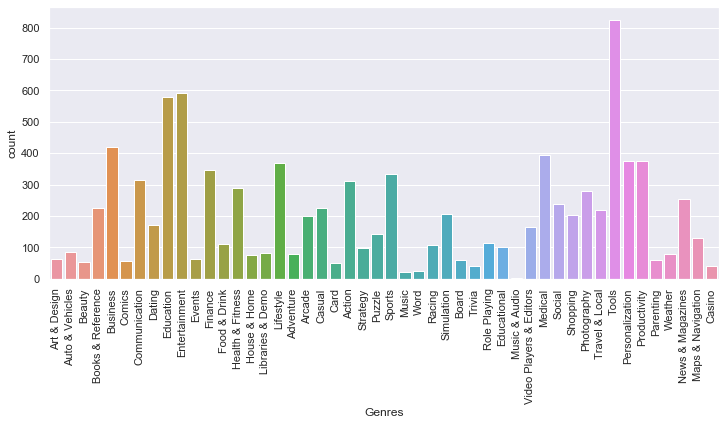

In [241]:

plt.figure(figsize=(12,5))
sns.countplot(data.Genres)
plt.xticks(rotation=90)
plt.show()

In [242]:
#Current Ver

In [243]:
data["Current Ver"].head()

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
Name: Current Ver, dtype: object

In [244]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new,year_added,month_added


In [245]:
import re
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].median())

In [246]:
#Android Ver

In [247]:
data["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [248]:
data["Android Ver"].isnull().sum()

0

In [249]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new,year_added,month_added


In [250]:
data['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1283
Varies with device     989
4.4 and up             818
2.3 and up             615
5.0 and up             512
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             115
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
2.2 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

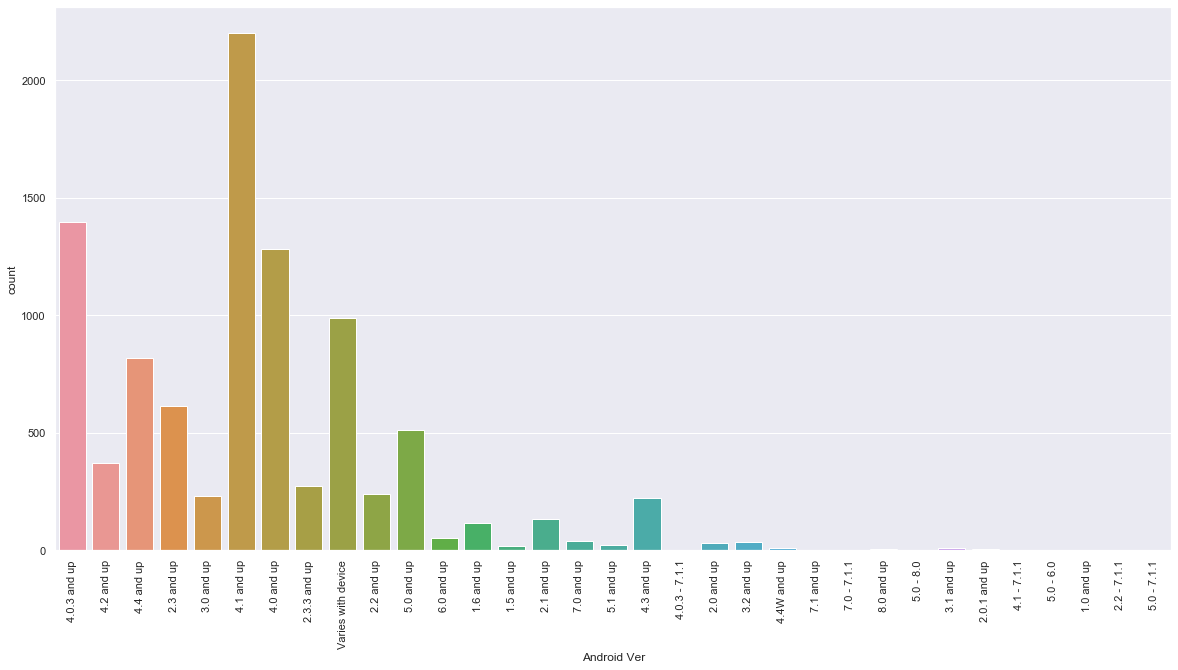

In [251]:
 

sns.countplot(data['Android Ver'])
plt.xticks(rotation=90)
plt.show()

In [252]:
data['Version_begin']=data['Android Ver'].apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data["Android Ver"].apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [253]:
twowaytable = pd.crosstab(index=data.Version_begin,columns=data.Version_end)
twowaytable.head()

Version_end,6.0,7.1.1,8.0,Varies with device,up
Version_begin,,,,,
1.0,0,0,0,0,2
1.5,0,0,0,0,19
1.6,0,0,0,0,115
2.0,0,0,0,0,31
2.0.1,0,0,0,0,7


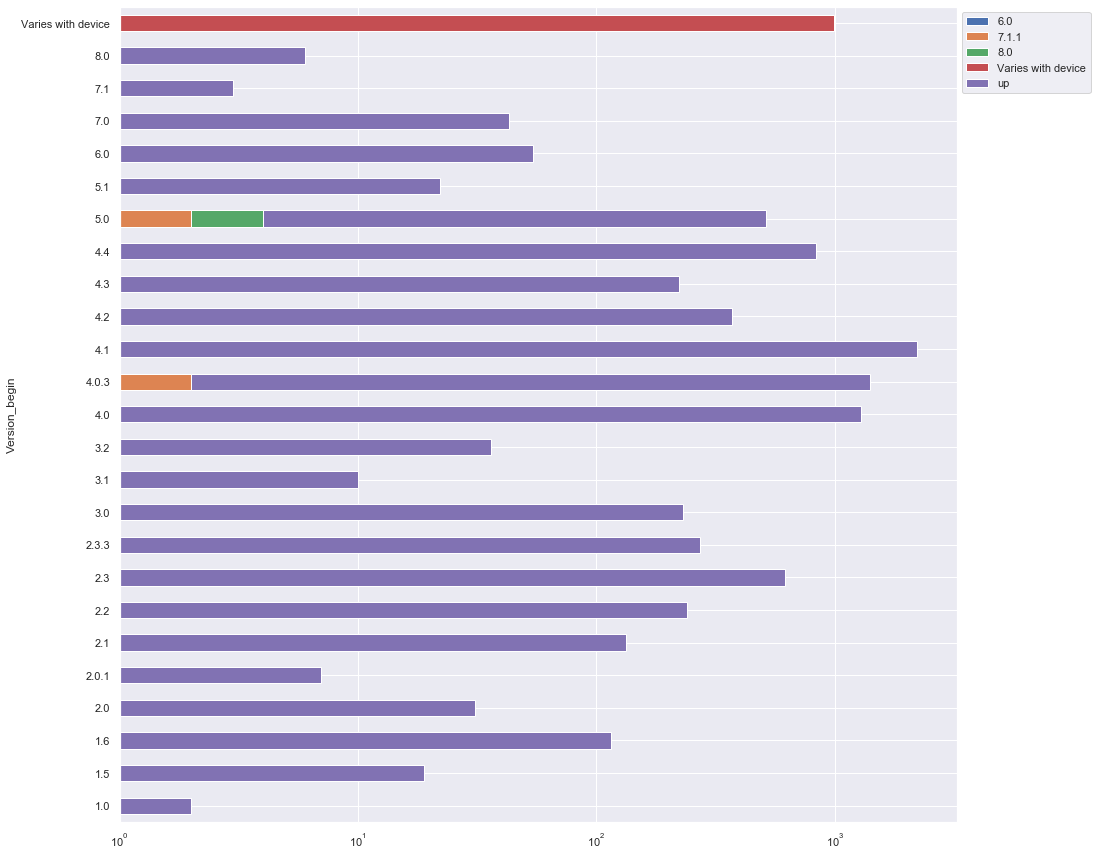

In [254]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

In [255]:
data.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', '6.0'], dtype=object)

In [256]:
#sns.pairplot(data)
#plt.show()

In [257]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_new,year_added,month_added,Version_begin,Version_end
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,9.0,1,0.0,Everyone,Art & Design,1970-01-01 00:00:01.515263400,1.00,4.0.3 and up,4,1970,1,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,12.0,1,0.0,Everyone,Art & Design,1970-01-01 00:00:01.515954600,2.00,4.0.3 and up,3,1970,1,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,14.0,1,0.0,Everyone,Art & Design,1970-01-01 00:00:01.533061800,1.24,4.0.3 and up,4,1970,1,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,16.0,1,0.0,Teen,Art & Design,1970-01-01 00:00:01.528396200,0.00,4.2 and up,4,1970,1,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,11.0,1,0.0,Everyone,Art & Design,1970-01-01 00:00:01.529433000,1.10,4.4 and up,4,1970,1,4.4,up


In [258]:
stop

NameError: name 'stop' is not defined

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())

In [ ]:
###MODEL

In [259]:
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [260]:
data.drop(['App','Genres','Last Updated','Current Ver','Android Ver',"Version_begin","Version_end","Rating_new"],axis=1,inplace=True)


In [261]:
data.head(3)


,Rating,Reviews,Size,Price,year_added,month_added,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_1,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,19000000.0,0.0,1970,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,3.9,967,14000000.0,0.0,1970,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,4.7,87510,8700000.0,0.0,1970,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [262]:
data.shape

(9648, 44)

In [263]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [265]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [267]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_accuracy: 0.771558872305141


In [268]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

DecisionTree_Classifier_accuracy: 0.6612769485903814


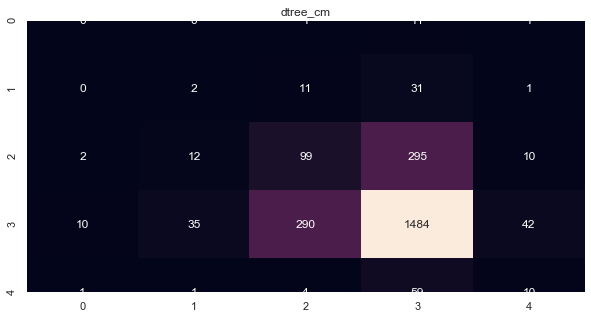

In [269]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

In [270]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM_regressor_accuracy: 0.771558872305141


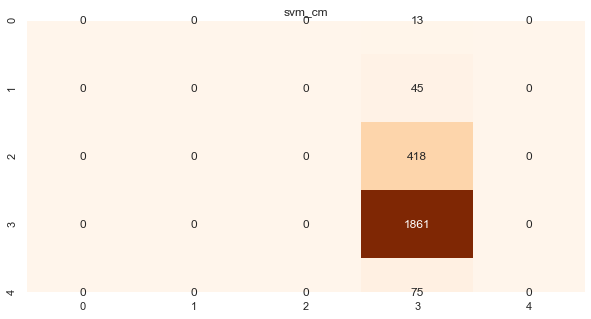

In [271]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

In [272]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

RandomForest_accuracy: 0.7230514096185738


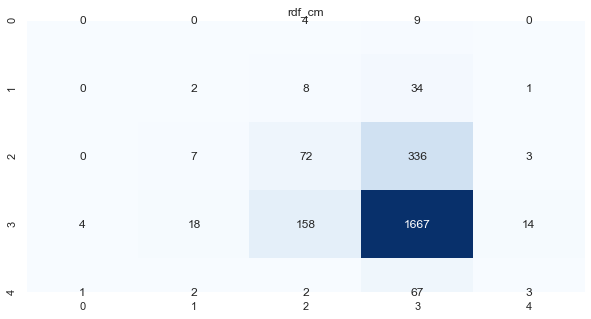

In [273]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

In [274]:
#Models comparision

Text(0.5, 1.0, 'Model Accracy')

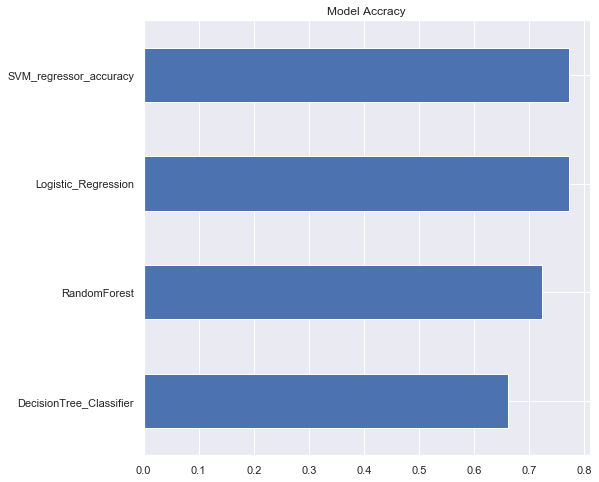

In [275]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

In [276]:
X=data[["Reviews","Price"]]
y=data.Rating

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

In [277]:
from sklearn.linear_model import LinearRegression
lin_r= LinearRegression()
model= lin_r.fit(X_train,y_train)

In [278]:
print(model.intercept_)
print(model.coef_)

4.169153409408199
[ 1.29125473e-08 -1.88878941e-04]


In [279]:
rating= model.predict(np.array([[1000,3]]))
print("Predicted rating is:",rating)

Predicted rating is: [4.16859969]


In [280]:
pred= model.predict(X_test)
pred

array([4.17449919, 4.16915369, 4.16916251, ..., 4.16957686, 4.17664475,
       4.1691801 ])

In [281]:
from sklearn.metrics import mean_squared_error
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred))))

RMSE: 0.49359021114221413


# NLP

In [282]:
user_data=pd.read_csv("googleplaystore_user_reviews.csv")

In [283]:
user_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [284]:
df=pd.concat([user_data.Translated_Review,user_data.Sentiment],axis=1)
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
7,NaN,NaN
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral


In [285]:
df.shape

(64295, 2)

In [286]:
df.isnull().sum()

Translated_Review    26868
Sentiment            26863
dtype: int64

In [287]:
df.dropna(axis=0,inplace=True)


In [288]:
df.isnull().sum()

Translated_Review    0
Sentiment            0
dtype: int64

In [289]:
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [290]:
df["index"] = range(0,37427)
df = df.set_index("index")
df.head()

,Translated_Review,Sentiment
index,,
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,Works great especially going grocery store,Positive
3,Best idea us,Positive
4,Best way,Positive


In [291]:
df.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Sentiments')

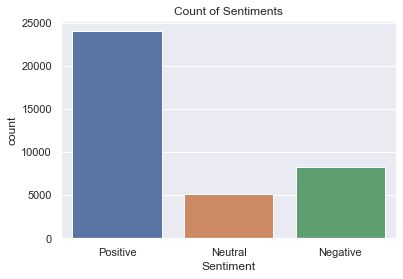

In [292]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.Sentiment)
plt.title("Count of Sentiments")

In [293]:
from sklearn.preprocessing import LabelEncoder

In [294]:
labelencoder = LabelEncoder()

In [295]:
df['Sentiment'] = labelencoder.fit_transform(df['Sentiment'])

In [296]:
df.head(10)

,Translated_Review,Sentiment
index,,
0,I like eat delicious food. That's I'm cooking ...,2
1,This help eating healthy exercise regular basis,2
2,Works great especially going grocery store,2
3,Best idea us,2
4,Best way,2
5,Amazing,2
6,"Looking forward app,",1
7,It helpful site ! It help foods get !,1
8,good you.,2


In [297]:
df.Sentiment.value_counts()

2    23998
0     8271
1     5158
Name: Sentiment, dtype: int64

In [298]:
# 0 for  Negative
# 1 for Neutral
# 2 for Positive

In [299]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [300]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,37427):
    review = re.sub('[^a-zA-Z]', ' ',df['Translated_Review'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',df['Translated_Review'][i])
    review = re.sub('[^0-9a-z #+_]', ' ',df['Translated_Review'][i])#Remove bad symbols
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)
corpus

['like eat delici food hat cook food case 10 est ood help lot also est efor helf ife',
 'help eat healthi exercis regular basi',
 'ork great especi go groceri store',
 'est idea us',
 'est way',
 'maze',
 'ook forward app',
 'help site help food get',
 'good',
 'seful inform amount spell error question valid inform share nce fix 5 star given',
 'hank reat app dd arthriti eye immun kidney liver detox food pleas',
 'reatest ever omplet awesom maintain health must ppl ove',
 'ood health ood health first prioriti',
 'ealth import world either life think',
 'rs sunita bhati thank develop make kind app realli good healthi food bodi',
 'eri seful diabet age 30 need control sugar thank',
 'ne greatest app',
 'good nice',
 'ealthi ealli help',
 'od health',
 '5',
 'n excel use',
 'found lot wealth form health',
 'ecaus found import',
 'ealthi ate',
 'eri good impli good',
 'n test',
 'ood',
 'hank advic ownload dobe reader still get recip book',
 'recip book nabl recip book',
 'bsolut abul heno

In [301]:
#Data cleaning
import re
first_text=df.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

In [302]:
words = []
Sentiment_Polarity=[]
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
    Sentiment_Polarity.append
words

['like',
 'eat',
 'delici',
 'food',
 'hat',
 'cook',
 'food',
 'case',
 '10',
 'est',
 'ood',
 'help',
 'lot',
 'also',
 'est',
 'efor',
 'helf',
 'ife',
 'help',
 'eat',
 'healthi',
 'exercis',
 'regular',
 'basi',
 'ork',
 'great',
 'especi',
 'go',
 'groceri',
 'store',
 'est',
 'idea',
 'us',
 'est',
 'way',
 'maze',
 'ook',
 'forward',
 'app',
 'help',
 'site',
 'help',
 'food',
 'get',
 'good',
 'seful',
 'inform',
 'amount',
 'spell',
 'error',
 'question',
 'valid',
 'inform',
 'share',
 'nce',
 'fix',
 '5',
 'star',
 'given',
 'hank',
 'reat',
 'app',
 'dd',
 'arthriti',
 'eye',
 'immun',
 'kidney',
 'liver',
 'detox',
 'food',
 'pleas',
 'reatest',
 'ever',
 'omplet',
 'awesom',
 'maintain',
 'health',
 'must',
 'ppl',
 'ove',
 'ood',
 'health',
 'ood',
 'health',
 'first',
 'prioriti',
 'ealth',
 'import',
 'world',
 'either',
 'life',
 'think',
 'rs',
 'sunita',
 'bhati',
 'thank',
 'develop',
 'make',
 'kind',
 'app',
 'realli',
 'good',
 'healthi',
 'food',
 'bodi',
 'er

In [303]:
from collections import Counter
words_counts = Counter(words)

In [304]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

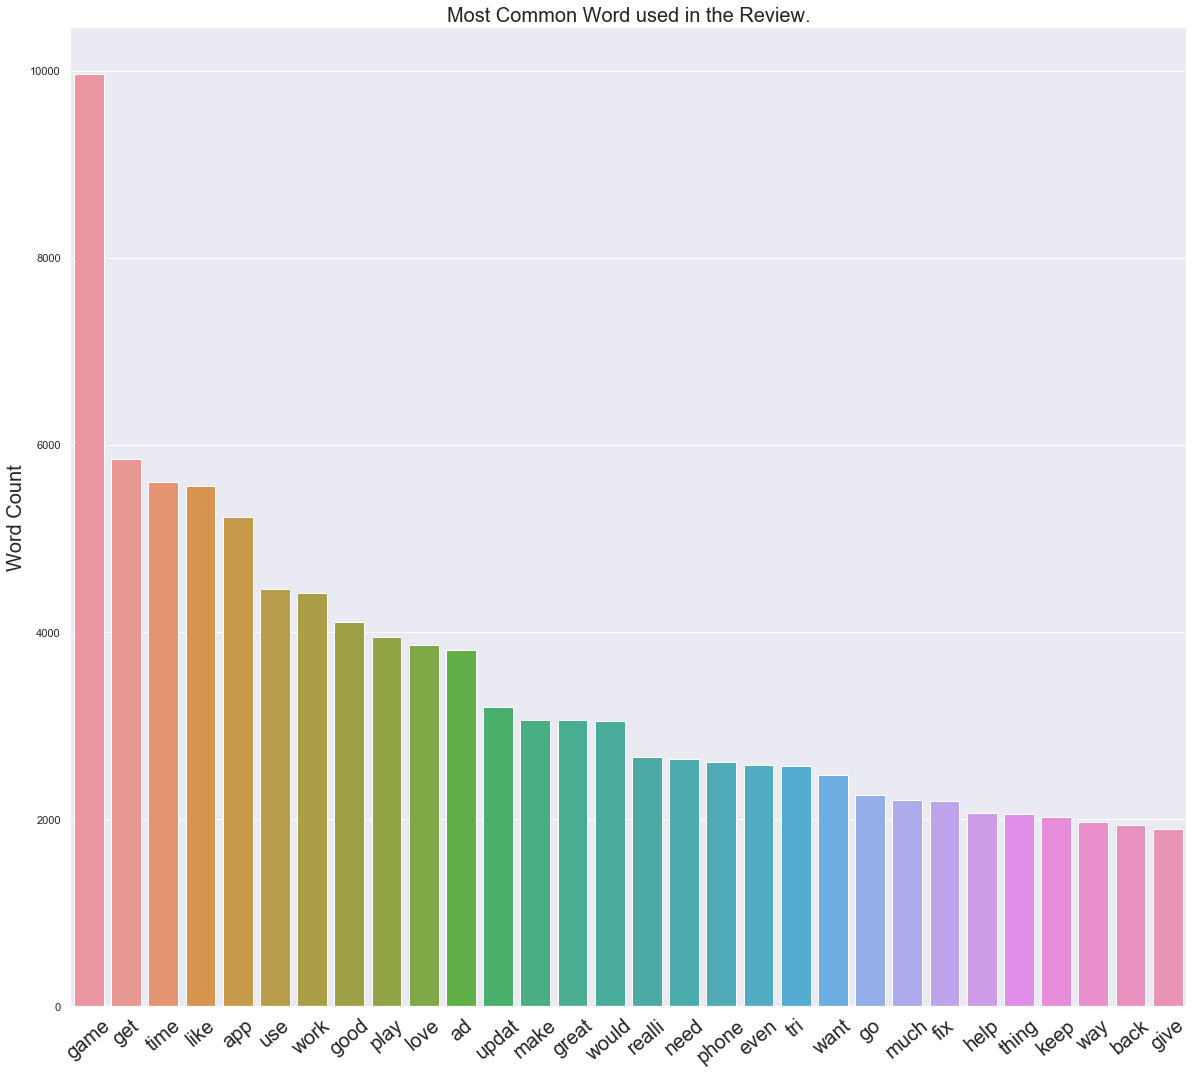

In [305]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()

In [306]:
k = most_commmom_wordList[0:30]
Sentiment_Polarity=[]
Positive=[]
Neutral=[]
Negative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
        #if i in z:
            #Sentiment.append(Data['Sentiment_Polarity'][corpus.index(z)])
    #Sentiment_Polarity.append(Sentiment)
        if i in z and df['Sentiment'][corpus.index(z)]=='Positive':
            Positive.append(i)
        if i in z and df['Sentiment'][corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and df['Sentiment'][corpus.index(z)]=='Negative':
            Negative.append(i)

In [313]:
'''f,ax = plt.subplots(3,1,figsize=(20,40))
c1 = sns.countplot(Positive, ax=ax[0])
c2 = sns.countplot(Neutral,ax=ax[1])
c3 = sns.countplot(Negative,ax=ax[2])
ax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviw",fontsize=20)
ax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviw",fontsize=20)
ax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviw",fontsize=20)
plt.show()'''

'f,ax = plt.subplots(3,1,figsize=(20,40))\nc1 = sns.countplot(Positive, ax=ax[0])\nc2 = sns.countplot(Neutral,ax=ax[1])\nc3 = sns.countplot(Negative,ax=ax[2])\nax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviw",fontsize=20)\nax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviw",fontsize=20)\nax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviw",fontsize=20)\nplt.show()'

In [314]:
print(df.Translated_Review[0]) #lets review of changings
print(text)

I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
useless app i searched flat kondapur hyderabad none number reachable i know flat unavailable would keep post active


In [315]:
#stopwords (irrelavent words)
import nltk
#nltk.download("stopwords")
#nltk.download("punkt")
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words

In [316]:
text

['useless',
 'app',
 'i',
 'searched',
 'flat',
 'kondapur',
 'hyderabad',
 'none',
 'number',
 'reachable',
 'i',
 'know',
 'flat',
 'unavailable',
 'would',
 'keep',
 'post',
 'active']

In [317]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'useless app i searched flat kondapur hyderabad none number reachable i know flat unavailable would keep post active'

In [318]:
text_list=[]
for i in df.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)


In [319]:
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

In [336]:
df['Clean_data']=text_list

In [320]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used words: ",all_words[50:100])

Most used words:  ['aborted', 'aborting', 'abortion', 'abou', 'abousolutely', 'abracadabra', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absorbing', 'abstract', 'abstraction', 'absurd', 'abt', 'abu', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abysmal', 'abyss', 'ac', 'aca', 'academia', 'acc', 'accasionly', 'accelent', 'accelerate', 'acceleration', 'accent', 'accentuates', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'acces', 'accesable', 'access', 'accessabilty']


In [321]:
#We converted our textes to array form, also removed irrelavent words.



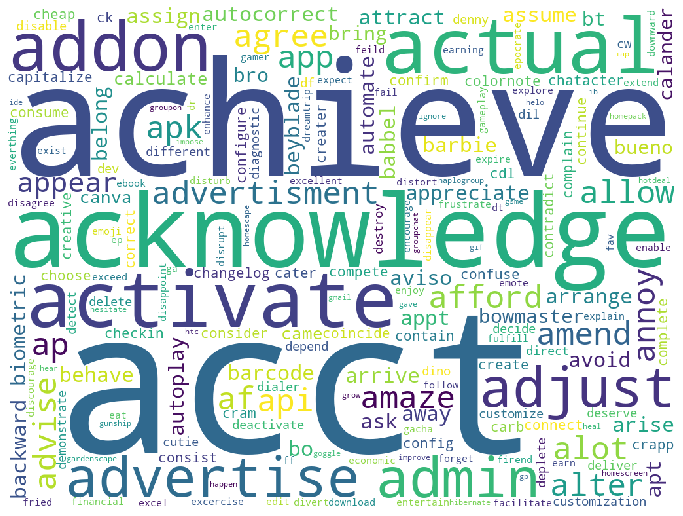

In [322]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(all_words[100:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [323]:
#classification
y=df.iloc[:,1].values
x=sparce_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [324]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(x_train,y_train)
print("accuracy: ",rf.score(x_test,y_test))


accuracy:  0.8756345177664975


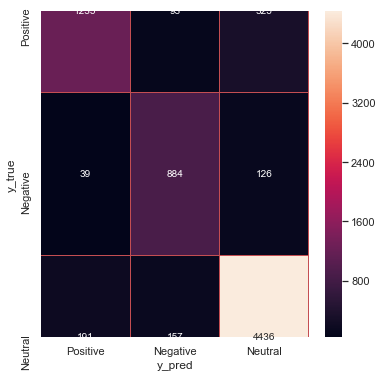

In [335]:
#confussion matrix
y_pred=rf.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=.1,linecolor="r",fmt=".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [326]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("lr accuracy: ",lr.score(x_test,y_test))

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


lr accuracy:  0.9084958589366818


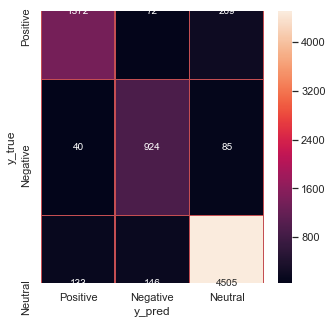

In [327]:
#confussion matrix
y_pred=lr.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [337]:
df.head()

,Translated_Review,Sentiment,Clean_data
index,,,
0,I like eat delicious food. That's I'm cooking ...,2,i like eat delicious food that s i m cooking f...
1,This help eating healthy exercise regular basis,2,this help eating healthy exercise regular basis
2,Works great especially going grocery store,2,work great especially going grocery store
3,Best idea us,2,best idea u
4,Best way,2,best way
